# Cositas

In [212]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import importlib
from functools import partial
import pandas as pd

In [213]:
class Binder:
    def __init__(self, module_name, function_name, params):

        self.module_name = module_name
        self.function_name = function_name
        self.params = params
        self.module = None
        self.prepared_function = None

    def import_module(self):
        """Imports the module and assigns it to self.module."""
        self.module = importlib.import_module(self.module_name)
        #print(f"Module {self.module_name} imported successfully.")

    def fixer(self):
        """Fixes parameters to the function and returns a partially applied function."""
        if self.module is None:
            print("You have to import_module first :)")
            return None

        func = getattr(self.module, self.function_name, None)
        if func is None:
            print(f"Function {self.function_name} not found in module {self.module_name}.")
            return None

        self.prepared_function = partial(func, *self.params)
        return self.prepared_function

In [214]:
def plot_3_ts(system, sol):
    fig, axs = plt.subplots(3, 1, figsize=(10, 8), sharex=True)
    jejes = ['x', 'y', 'z']
    colors = ['red', 'green', 'blue']

    for i, j in enumerate(jejes):
        axs[i].plot(sol.t, sol.y[i], color=colors[i])
        axs[i].set_ylabel(j)
        axs[i].set_title(f'{system} System: {j} vs Time (RK45)')

    plt.tight_layout()
    plt.show()

In [215]:
def from_sol_to_df(sol,sol_dim,freq):
  if sol_dim == 2:
    df = pd.DataFrame({'x':sol.y[0],'y':sol.y[1] })
    df = df.copy()
    df['date'] = pd.date_range(start='1970-01-01', periods=len(df), freq=freq)
    df = df.set_index('date')
    df = df.asfreq(freq)
    # Rename the 'Demand' column to 'y' in the DataFrame
    df = df.rename(columns = {'y': 'exo_1'})
    df = df.rename(columns = {'x': 'y'})
    df_transitioned = df
    return df_transitioned
  elif sol_dim == 3:
    df = pd.DataFrame({'x':sol.y[0],'y':sol.y[1],'z':sol.y[2] })
    df = df.copy()
    df['date'] = pd.date_range(start='1970-01-01', periods=len(df), freq=freq)
    df = df.set_index('date')
    df = df.asfreq(freq)
    # Rename the 'Demand' column to 'y' in the DataFrame
    df = df.rename(columns = {'y': 'exo_1', 'z' : 'exo_2'})
    df = df.rename(columns = {'x': 'y'})
    df_transitioned = df
    return df_transitioned

In [216]:
def plot_3d(sol):
  fig = plt.figure(figsize=(10, 8))
  ax = fig.add_subplot(111, projection='3d')
  ax.plot(sol.y[0], sol.y[1], sol.y[2],
          color='purple', lw=0.5)
  ax.set_xlabel('x')
  ax.set_ylabel('y')
  ax.set_zlabel('z')
  ax.set_title(f'Attractor (3D)')  # {self.f.func.__name__}
  ax.view_init(elev=30, azim=60)

In [217]:
def tesefresco(df):
  df_prep = df.copy().reset_index()
  df_prep_new = df_prep[["date", "y"]]
  df_prep_new['date'] = 1
  return df_prep_new

# Generacion de Series de Tiempo de Rossler

In [218]:
rossler = """
def rossler(a,b,c, t,state):
    x, y, z = state
    dx = - y - z
    dy = x + a * y
    dz = b + z * (x - c)
    return [dx,dy,dz]
"""

In [219]:
with open("rossler.py", "w") as f:
    f.write(rossler.strip())

In [220]:
# Parameters
a = 0.2
b = 0.2
c = 5.7
params = (a,b,c)

# Use Binder to fix parameters
binder = Binder("rossler", "rossler", params)
binder.import_module()
rossler_fixed = binder.fixer()  # Partially applied function

In [221]:
t_span = (0, 105)
t_eval = np.linspace(t_span[0], t_span[1], 10000)

In [222]:
y0 = [0.1, 0.1, 0.1]
# Solve the system
sol_0_rossler = solve_ivp(rossler_fixed, t_span, y0, method='RK45', t_eval=t_eval)

In [223]:
rossler_sample_0 = from_sol_to_df(sol_0_rossler,3,'D')

In [224]:
y0 = [0.2, 0.2, 0.2]
# Solve the system
sol_1_rossler = solve_ivp(rossler_fixed, t_span, y0, method='RK45', t_eval=t_eval)

In [225]:
rossler_sample_1= from_sol_to_df(sol_1_rossler,3,'D')

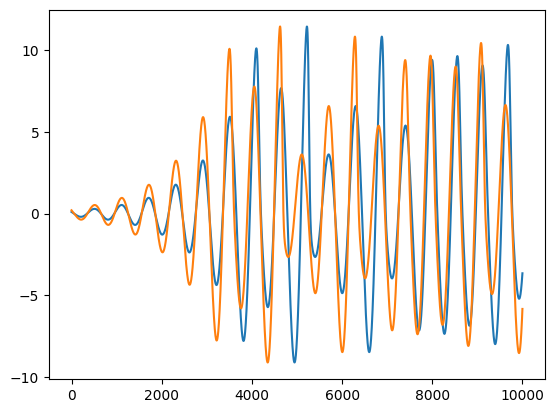

In [226]:
plt.plot(sol_0_rossler.y[0])
plt.plot(sol_1_rossler.y[0])

In [227]:
y0 = [0.3, 0.3, 0.3]
# Solve the system
sol_2_rossler = solve_ivp(rossler_fixed, t_span, y0, method='RK45', t_eval=t_eval)

In [228]:
rossler_sample_2= from_sol_to_df(sol_2_rossler,3,'D')

In [229]:
y0 = [0.4, 0.4, 0.4]
# Solve the system
sol_3_rossler = solve_ivp(rossler_fixed, t_span, y0, method='RK45', t_eval=t_eval)

In [230]:
rossler_sample_3= from_sol_to_df(sol_3_rossler,3,'D')

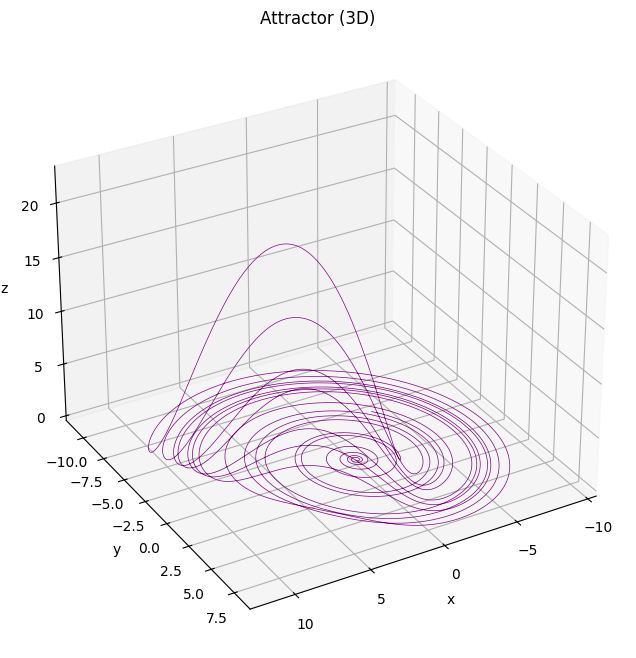

In [231]:
plot_3d(sol_0_rossler)

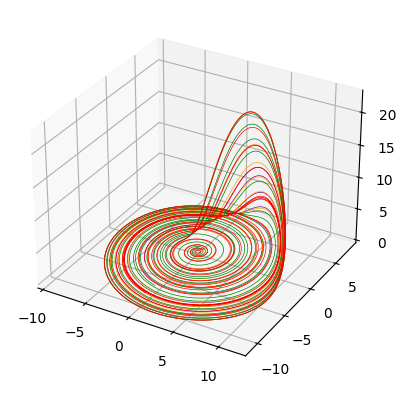

In [232]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# First trajectory
ax.plot(sol_0_rossler.y[0], sol_0_rossler.y[1], sol_0_rossler.y[2], color='purple', lw=0.5)

# Second trajectory
ax.plot(sol_1_rossler.y[0], sol_1_rossler.y[1], sol_1_rossler.y[2], color='orange', lw=0.5)

# Third trajectory
ax.plot(sol_2_rossler.y[0], sol_2_rossler.y[1], sol_2_rossler.y[2], color='green', lw=0.5)

# Fouth trajectory
ax.plot(sol_3_rossler.y[0], sol_3_rossler.y[1], sol_3_rossler.y[2], color='red', lw=0.5)

plt.show()

# Generacion de Series de Tiempo de Lorenz63

In [233]:
lorenz63 = """
def lorenz63(sigma, beta, rho, t, state):
    x, y, z = state
    dx = sigma * (y - x)
    dy = x * (rho - z) - y
    dz = x *  y - beta *z
    return [dx,dy,dz]
"""

In [234]:
with open("lorenz63.py", "w") as f:
    f.write(lorenz63.strip())

In [235]:
# Parameters
sigma = 10
beta = 8/3
rho = 25.5
params = (sigma,beta,rho)

# Use Binder to fix parameters
binder = Binder("lorenz63", "lorenz63", params)
binder.import_module()
lorenz63_fixed = binder.fixer()  # Partially applied function

In [236]:
t_span = (0, 105)
t_eval = np.linspace(t_span[0], t_span[1], 10000)

In [237]:
y0 = [0.1, 0.1, 0.1]
# Solve the system
sol_0_lorenz63 = solve_ivp(lorenz63_fixed, t_span, y0, method='RK45', t_eval=t_eval)

In [238]:
lorenz63_sample_0 = from_sol_to_df(sol_0_lorenz63,3,'D')

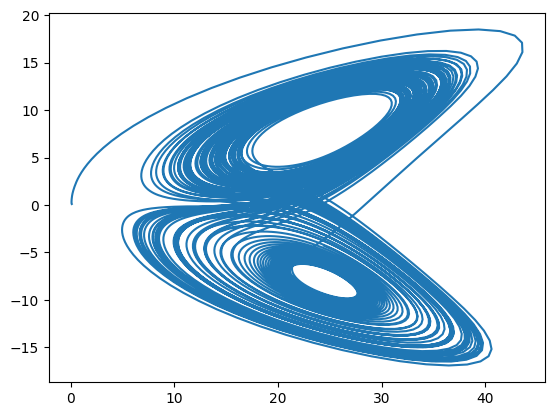

In [239]:
plt.plot(sol_0_lorenz63.y[2], sol_0_lorenz63.y[0])

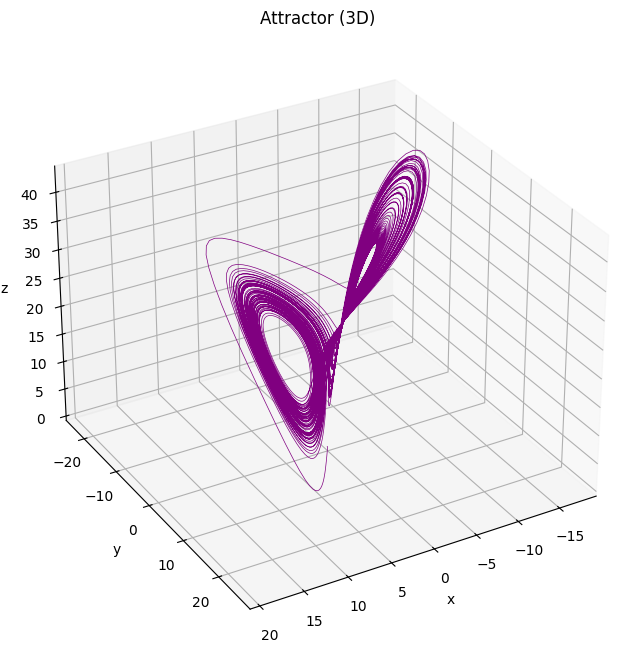

In [240]:
plot_3d(sol_0_lorenz63)

In [241]:
y0 = [0.2, 0.2, 0.2]
# Solve the system
sol_1_lorenz63 = solve_ivp(lorenz63_fixed, t_span, y0, method='RK45', t_eval=t_eval)

In [242]:
lorenz63_sample_1 = from_sol_to_df(sol_1_lorenz63,3,'D')

In [243]:
y0 = [0.3, 0.3, 0.3]
# Solve the system
sol_2_lorenz63 = solve_ivp(lorenz63_fixed, t_span, y0, method='RK45', t_eval=t_eval)

In [244]:
lorenz63_sample_2 = from_sol_to_df(sol_2_lorenz63,3,'D')

In [245]:
y0 = [0.4, 0.4, 0.4]
# Solve the system
sol_3_lorenz63 = solve_ivp(lorenz63_fixed, t_span, y0, method='RK45', t_eval=t_eval)

In [246]:
lorenz63_sample_3 = from_sol_to_df(sol_3_lorenz63,3,'D')

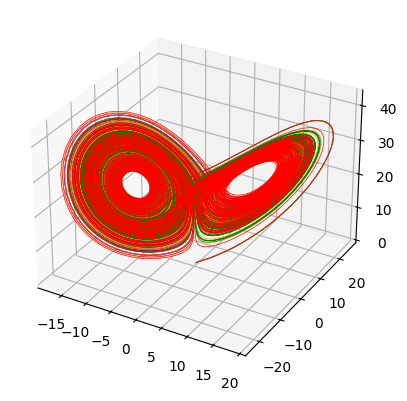

In [247]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# First trajectory
ax.plot(sol_0_lorenz63.y[0], sol_0_lorenz63.y[1], sol_0_lorenz63.y[2], color='purple', lw=0.5)

# Second trajectory
ax.plot(sol_1_lorenz63.y[0], sol_1_lorenz63.y[1], sol_1_lorenz63.y[2], color='orange', lw=0.5)

# Third trajectory
ax.plot(sol_2_lorenz63.y[0], sol_2_lorenz63.y[1], sol_2_lorenz63.y[2], color='green', lw=0.5)

# Fouth trajectory
ax.plot(sol_3_lorenz63.y[0], sol_3_lorenz63.y[1], sol_3_lorenz63.y[2], color='red', lw=0.5)

plt.show()

# Generacion de Series de Tiempo de Aizawa

In [248]:
aizawa = '''
def aizawa(a, b, c, d, e, f, t,state):
    x, y, z = state
    dx = (z - b) * x - d * y
    dy = d * x + (z - b) * y
    dz = c + a * z - (z**3)/3 - (x ** 2 + y ** 2) * (1 + e *z) + f * z * x **3
    return [dx,dy,dz]
'''

In [249]:
with open("aizawa.py", "w") as f:
    f.write(aizawa.strip())

In [250]:
# Parameters
a = 0.95
b = 0.7
c = 0.65
d = 3.5
e = 0.25
f = 0.1
params = (a,b, c, d, e, f)

# Use Binder to fix parameters
binder = Binder("aizawa", "aizawa", params)
binder.import_module()
aizawa_fixed = binder.fixer()  # Partially applied function

In [251]:
t_span = (0, 105)
t_eval = np.linspace(t_span[0], t_span[1], 10000)

In [252]:
y0 = [0.1, 0.1, 0.1]
# Solve the system
sol_0_aizawa = solve_ivp(aizawa_fixed, t_span, y0, method='RK45', t_eval=t_eval)

In [253]:
aizawa_sample_0 = from_sol_to_df(sol_0_aizawa,3,'D')

In [254]:
y0 = [0.2, 0.2, 0.2]
# Solve the system
sol_1_aizawa = solve_ivp(aizawa_fixed, t_span, y0, method='RK45', t_eval=t_eval)

In [255]:
aizawa_sample_1 = from_sol_to_df(sol_1_aizawa,3,'D')

In [256]:
y0 = [0.3, 0.3, 0.3]
# Solve the system
sol_2_aizawa = solve_ivp(aizawa_fixed, t_span, y0, method='RK45', t_eval=t_eval)

In [257]:
aizawa_sample_2 = from_sol_to_df(sol_2_aizawa,3,'D')

In [258]:
y0 = [0.4, 0.4, 0.4]
# Solve the system
sol_3_aizawa = solve_ivp(aizawa_fixed, t_span, y0, method='RK45', t_eval=t_eval)

In [259]:
aizawa_sample_3 = from_sol_to_df(sol_3_aizawa,3,'D')

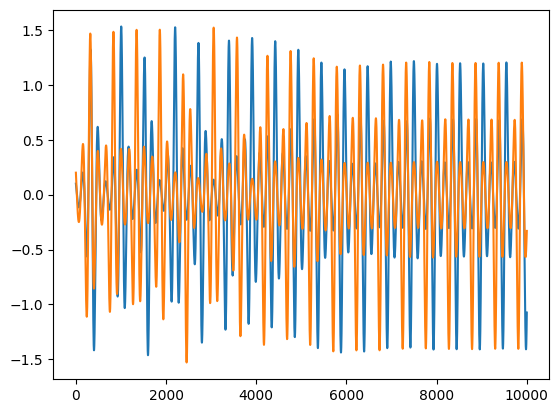

In [260]:
plt.plot(sol_0_aizawa.y[0])
plt.plot(sol_1_aizawa.y[0])
#plt.xlim(2000,5000)

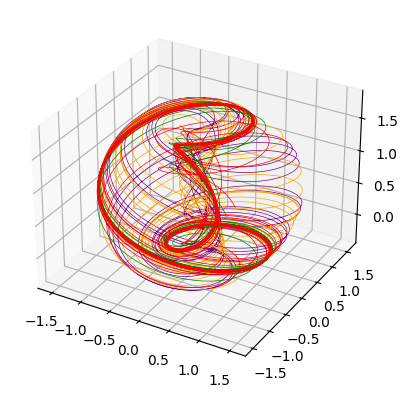

In [261]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# First trajectory
ax.plot(sol_0_aizawa.y[0], sol_0_aizawa.y[1], sol_0_aizawa.y[2], color='purple', lw=0.5)

# Second trajectory
ax.plot(sol_1_aizawa.y[0], sol_1_aizawa.y[1], sol_1_aizawa.y[2], color='orange', lw=0.5)

# Third trajectory
ax.plot(sol_2_aizawa.y[0], sol_2_aizawa.y[1], sol_2_aizawa.y[2], color='green', lw=0.5)

# Fouth trajectory
ax.plot(sol_3_aizawa.y[0], sol_3_aizawa.y[1], sol_3_aizawa.y[2], color='red', lw=0.5)

plt.show()


# Generacion de Series de Tiempo de Sprott

In [262]:
sprott = '''
def sprott(a, b, t,state):
    x, y, z = state
    dx = y + a * x * y + x * z
    dy = 1 - b * x **2 + y * z
    dz = x - x ** 2 - y ** 2
    return [dx,dy,dz]
'''

In [263]:
with open("sprott.py", "w") as f:
    f.write(sprott.strip())

In [264]:
# Parameters
a = 2.07
b = 1.79
params = (a,b)

# Use Binder to fix parameters
binder = Binder("sprott", "sprott", params)
binder.import_module()
sprott_fixed = binder.fixer()  # Partially applied function

In [265]:
t_span = (0, 105)
t_eval = np.linspace(t_span[0], t_span[1], 10000)

In [266]:
y0 = [0.1, 0.1, 0.1]
# Solve the system
sol_0_sprott = solve_ivp(sprott_fixed, t_span, y0, method='RK45', t_eval=t_eval)

In [267]:
sprott_sample_0 = from_sol_to_df(sol_0_sprott,3,'D')

In [268]:
y0 = [0.2, 0.2, 0.2]
# Solve the system
sol_1_sprott = solve_ivp(sprott_fixed, t_span, y0, method='RK45', t_eval=t_eval)

In [269]:
sprott_sample_1 = from_sol_to_df(sol_1_sprott,3,'D')

In [270]:
y0 = [0.3, 0.3, 0.3]
# Solve the system
sol_2_sprott = solve_ivp(sprott_fixed, t_span, y0, method='RK45', t_eval=t_eval)

In [271]:
sprott_sample_2 = from_sol_to_df(sol_2_sprott,3,'D')

In [272]:
y0 = [0.4, 0.4,0.4]
# Solve the system
sol_3_sprott = solve_ivp(sprott_fixed, t_span, y0, method='RK45', t_eval=t_eval)

In [273]:
sprott_sample_3 = from_sol_to_df(sol_3_sprott,3,'D')

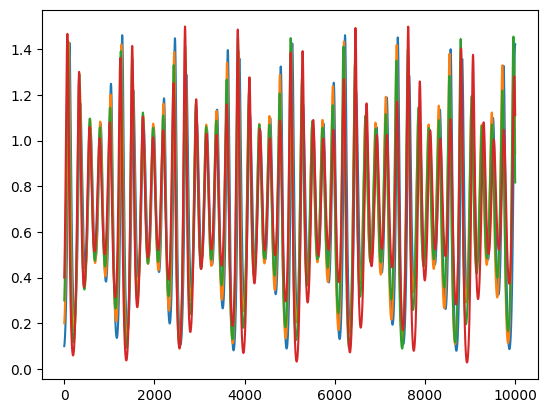

In [274]:
plt.plot(sol_0_sprott.y[0])
plt.plot(sol_1_sprott.y[0])
plt.plot(sol_2_sprott.y[0])
plt.plot(sol_3_sprott.y[0])
#plt.xlim(2000,5000)

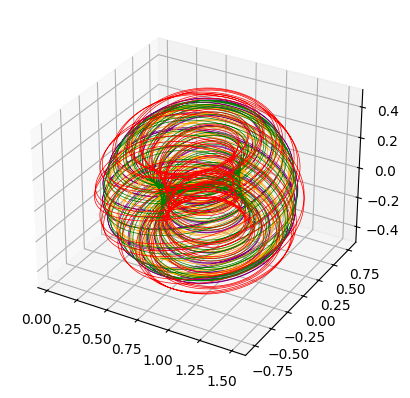

In [275]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# First trajectory
ax.plot(sol_0_sprott.y[0], sol_0_sprott.y[1], sol_0_sprott.y[2], color='purple', lw=0.5)

# Second trajectory
ax.plot(sol_1_sprott.y[0], sol_1_sprott.y[1], sol_1_sprott.y[2], color='orange', lw=0.5)

# Third trajectory
ax.plot(sol_2_sprott.y[0], sol_2_sprott.y[1], sol_2_sprott.y[2], color='green', lw=0.5)

# Fouth trajectory
ax.plot(sol_3_sprott.y[0], sol_3_sprott.y[1], sol_3_sprott.y[2], color='red', lw=0.5)

plt.show()


# Generacion de Series de Tiempo de Dadras

In [276]:
dadras = '''
def dadras(a, b, c, d, e, t,state):
    x, y, z = state
    dx = y - a * x  + b * y * z
    dy = c * y - x * z + z
    dz = d * x * y - e * z
    return [dx,dy,dz]
'''

In [277]:
with open("dadras.py", "w") as f:
    f.write(dadras.strip())

In [278]:
# Parameters
a = 3
b = 2.7
c = 1.7
d = 2
e = 9
params = (a,b,c,d,e)

# Use Binder to fix parameters
binder = Binder("dadras", "dadras", params)
binder.import_module()
dadras_fixed = binder.fixer()  # Partially applied function

In [279]:
t_span = (0, 105)
t_eval = np.linspace(t_span[0], t_span[1], 10000)

In [280]:
y0 = [0.1, 0.1, 0.1]
# Solve the system
sol_0_dadras = solve_ivp(dadras_fixed, t_span, y0, method='RK45', t_eval=t_eval)

In [281]:
dadras_sample_0 = from_sol_to_df(sol_0_dadras,3,'D')

In [282]:
y0 = [0.2, 0.2, 0.2]
# Solve the system
sol_1_dadras = solve_ivp(dadras_fixed, t_span, y0, method='RK45', t_eval=t_eval)

In [283]:
dadras_sample_1 = from_sol_to_df(sol_1_dadras,3,'D')

In [284]:
y0 = [0.3, 0.3, 0.3]
# Solve the system
sol_2_dadras = solve_ivp(dadras_fixed, t_span, y0, method='RK45', t_eval=t_eval)

In [285]:
dadras_sample_2 = from_sol_to_df(sol_2_dadras,3,'D')

In [286]:
y0 = [0.4, 0.4, 0.4]
# Solve the system
sol_3_dadras = solve_ivp(dadras_fixed, t_span, y0, method='RK45', t_eval=t_eval)

In [287]:
dadras_sample_3 = from_sol_to_df(sol_3_dadras,3,'D')

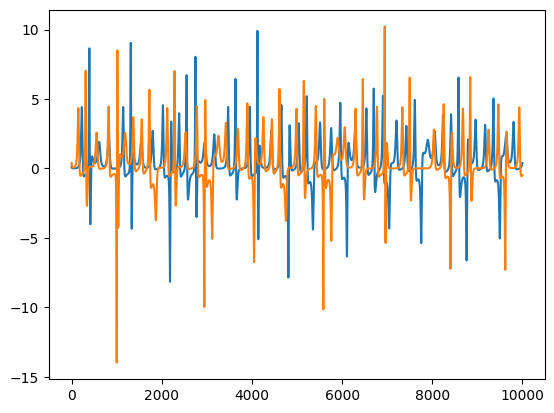

In [288]:
plt.plot(sol_0_dadras.y[2])
plt.plot(sol_3_dadras.y[2])
#plt.xlim(2000,5000)

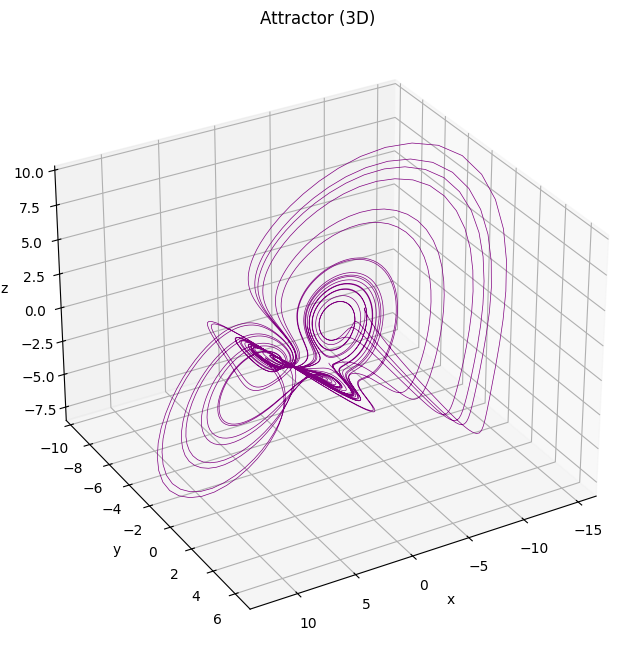

In [289]:
plot_3d(sol_0_dadras)

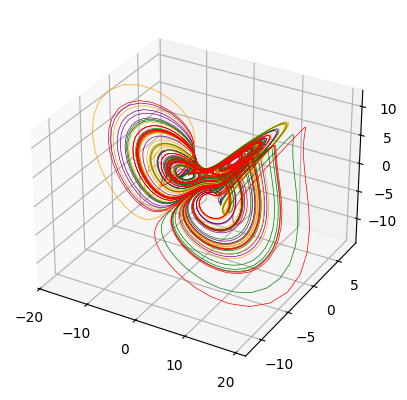

In [290]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# First trajectory
ax.plot(sol_0_dadras.y[0], sol_0_dadras.y[1], sol_0_dadras.y[2], color='purple', lw=0.5)

# Second trajectory
ax.plot(sol_1_dadras.y[0], sol_1_dadras.y[1], sol_1_dadras.y[2], color='orange', lw=0.5)

# First trajectory
ax.plot(sol_2_dadras.y[0], sol_2_dadras.y[1], sol_2_dadras.y[2], color='green', lw=0.5)

# Second trajectory
ax.plot(sol_3_dadras.y[0], sol_3_dadras.y[1], sol_3_dadras.y[2], color='red', lw=0.5)

plt.show()

# Caothic Measures Calculations lololol

In [295]:
pip install nolds

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.7/225.7 kB 6.4 MB/s eta 0:00:00


In [25]:
import nolds

lyap = nolds.lyap_r(rossler_sample_1['y'])
print("Lyapunov Exponent:", lyap)

Lyapunov Exponent: 0.0007819137928074259


In [26]:
corr_dim = nolds.corr_dim(rossler_sample_1['y'], emb_dim=10)
print("Correlation Dimension:", corr_dim)

Correlation Dimension: 1.4213000993097504


In [27]:
ap_entropy = nolds.sampen(rossler_sample_1['y'])
print("Approximate Kolmogorov Entropy:", ap_entropy)

Approximate Kolmogorov Entropy: 0.030518902828979105


In [296]:
import matplotlib.pyplot as plt
import nolds

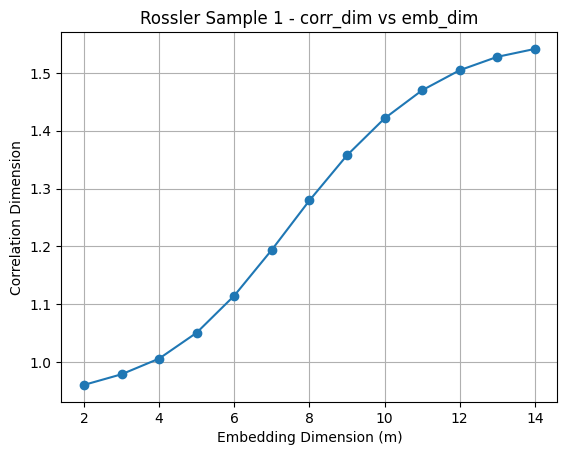

In [297]:
y = rossler_sample_1['y'].values
dims = list(range(2, 15))
cds = [nolds.corr_dim(y, emb_dim=m) for m in dims]

plt.plot(dims, cds, marker='o')
plt.xlabel("Embedding Dimension (m)")
plt.ylabel("Correlation Dimension")
plt.title("Rossler Sample 1 - corr_dim vs emb_dim")
plt.grid(True)
plt.show()


In [298]:
dataframes = [rossler_sample_0, rossler_sample_1, rossler_sample_2, rossler_sample_3,
              lorenz63_sample_0, lorenz63_sample_1, lorenz63_sample_2, lorenz63_sample_3,
              aizawa_sample_0, aizawa_sample_1, aizawa_sample_2, aizawa_sample_3,
              dadras_sample_0, dadras_sample_1, dadras_sample_2, dadras_sample_3,
              sprott_sample_0, sprott_sample_1, sprott_sample_2, sprott_sample_3]

In [299]:
# Corresponding system labels
labels = ['rossler'] * 4 + ['lorenz63'] * 4 + ['aizawa'] * 4 + ['dadras'] * 4 + ['sprott'] * 4

In [300]:
# Feature extraction function (uses your actual functions)
def extract_chaos_features(df):
    y = df['y'].values
    return {
        'lyap': nolds.lyap_r(y),
        'corr_dim': nolds.corr_dim(y, emb_dim=10),
        'ap_entropy': nolds.sampen(y),
    }

In [301]:
# Generate feature dictionary for each sample
feature_dicts = []

for df, label in zip(dataframes, labels):
    features = extract_chaos_features(df)
    features['system'] = label
    feature_dicts.append(features)

In [302]:
# Create final DataFrame
features_df = pd.DataFrame(feature_dicts)

In [303]:
features_df

lyap  corr_dim  ap_entropy    system
0   0.000906  1.303454    0.026955   rossler
1   0.000650  1.421300    0.030519   rossler
2   0.001003  1.465523    0.032465   rossler
3   0.000947  1.480771    0.033371   rossler
4   0.008874  1.581581    0.144200  lorenz63
5   0.011247  1.689316    0.152121  lorenz63
6   0.007605  1.653539    0.156238  lorenz63
7   0.010935  1.689646    0.149484  lorenz63
8   0.000657  1.649744    0.105741    aizawa
9   0.000387  1.592267    0.107900    aizawa
10  0.000713  1.304083    0.104917    aizawa
11  0.000410  1.394273    0.106966    aizawa
12  0.019033  1.268838    0.041149    dadras
13  0.022899  1.240609    0.038767    dadras
14  0.016091  1.256236    0.041672    dadras
15  0.012186  1.145555    0.034729    dadras
16  0.002475  1.621857    0.079635    sprott
17  0.002762  1.606159    0.078956    sprott
18  0.005510  1.610613    0.079875    sprott
19  0.003134  1.588900    0.079471    sprott

In [304]:
features_df.to_csv("chaos_features.csv", index=False)

In [320]:
df_combined = pd.concat([chaos_features, X_rep], axis=1)

In [322]:
df_combined.drop(columns=['sample_name'], inplace=True)

In [ ]:
df_combined.to_csv("df_combined.csv", index=False)

In [309]:
chaos_features = pd.read_csv("chaos_features.csv")

In [310]:
# Reorder columns to put 'sample_name' first
cols = ['system'] + [col for col in chaos_features.columns if col != 'system']
chaos_features = chaos_features[cols]

In [318]:
chaos_features

system      lyap  corr_dim  ap_entropy
0    rossler  0.000906  1.303454    0.026955
1    rossler  0.000650  1.421300    0.030519
2    rossler  0.001003  1.465523    0.032465
3    rossler  0.000947  1.480771    0.033371
4   lorenz63  0.008874  1.581581    0.144200
5   lorenz63  0.011247  1.689316    0.152121
6   lorenz63  0.007605  1.653539    0.156238
7   lorenz63  0.010935  1.689646    0.149484
8     aizawa  0.000657  1.649744    0.105741
9     aizawa  0.000387  1.592267    0.107900
10    aizawa  0.000713  1.304083    0.104917
11    aizawa  0.000410  1.394273    0.106966
12    dadras  0.019033  1.268838    0.041149
13    dadras  0.022899  1.240609    0.038767
14    dadras  0.016091  1.256236    0.041672
15    dadras  0.012186  1.145555    0.034729
16    sprott  0.002475  1.621857    0.079635
17    sprott  0.002762  1.606159    0.078956
18    sprott  0.005510  1.610613    0.079875
19    sprott  0.003134  1.588900    0.079471

In [312]:
# Separate labels and features
y_raw = chaos_features.iloc[:, 0].values  # labels (first column)
X = chaos_features.iloc[:, 1:].values     # features (rest columns)
# Convert string labels to integers if needed
le = LabelEncoder()
y = le.fit_transform(y_raw)  # Now y is numeric 0,1,2,3,4

In [314]:
# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

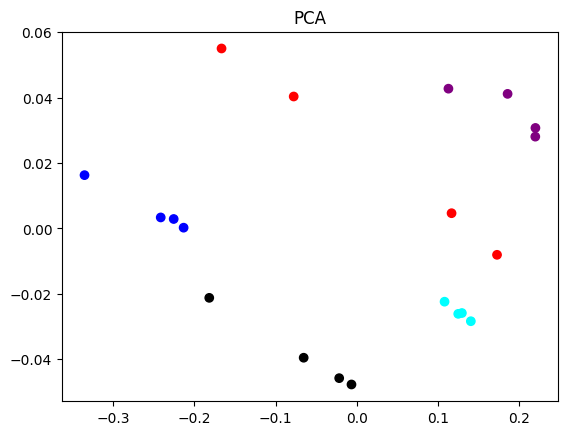

In [315]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=my_cmap)
plt.title("PCA")
plt.show()

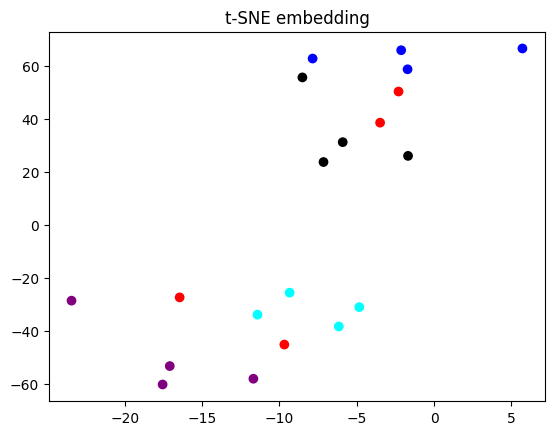

In [316]:
from sklearn.manifold import TSNE

X_tsne = TSNE(n_components=2, perplexity=5, random_state=0).fit_transform(X)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap=my_cmap)
plt.title("t-SNE embedding")
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


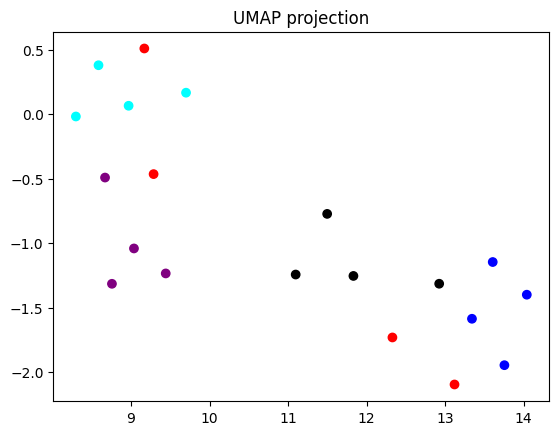

In [317]:
import umap
import matplotlib.pyplot as plt

# Fit UMAP on your features (before PCA)
reducer = umap.UMAP(random_state=0)
X_umap = reducer.fit_transform(X)

# Plot
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap=my_cmap)
plt.title("UMAP projection")
plt.show()


# Construyendo nuestro df

En este caso nos vamos a concentrar en la serie x, el analisis se puede extender usando las 3 series de cada sistema pero no lo haremos todavia.

In [1]:
pip install tsfresh

In [106]:
pana = tesefresco(rossler_sample_1)

In [107]:
pana.head()

date         y
0     1  0.200000
1     1  0.195835
2     1  0.191738
3     1  0.187704
4     1  0.183728

## Bacano

In [ ]:
from tsfresh import extract_features
from tsfresh import extract_relevant_features

def extracto(df):
  df_prep = tesefresco(df)
  weee = extract_features(df, column_id='date')
  return weee

In [ ]:
rossler_sample_1 = rossler_sample_1.reset_index()
rossler_sample_1_new = rossler_sample_1[["date", "y"]]
rossler_sample_1_new['date'] = 1

<ipython-input-82-4142535321>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rossler_sample_1_new['date'] = 1


In [ ]:
rossler_sample_1.head()

date         y     exo_1     exo_2
0 1970-01-01  0.200000  0.200000  0.200000
1 1970-01-02  0.195835  0.202501  0.190813
2 1970-01-03  0.191738  0.204964  0.182133
3 1970-01-04  0.187704  0.207389  0.173934
4 1970-01-05  0.183728  0.209777  0.166189

In [ ]:
df_prep = rossler_sample_1.copy().reset_index()

In [ ]:
df_prep_new = df_prep[["date", "y"]]

In [ ]:
df_prep_new.head()

date         y
0 1970-01-01  0.200000
1 1970-01-02  0.195835
2 1970-01-03  0.191738
3 1970-01-04  0.187704
4 1970-01-05  0.183728

In [ ]:
df_prep_new['date'] = 1

<ipython-input-87-1350995393>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prep_new['date'] = 1


In [ ]:
df_prep_new.head()

date         y
0     1  0.200000
1     1  0.195835
2     1  0.191738
3     1  0.187704
4     1  0.183728

In [ ]:
from tsfresh import extract_features

def extracto(df):
    df_prep = tesefresco(df)  # your preprocessing function
    weee = extract_features(df_prep, column_id='date')
    return weee

# Suppose you have a list of your 20 dataframes
dataframes = [rossler_sample_0, rossler_sample_1, rossler_sample_2, rossler_sample_3,
              lorenz63_sample_0, lorenz63_sample_1, lorenz63_sample_2, lorenz63_sample_3,
              aizawa_sample_0, aizawa_sample_1, aizawa_sample_2, aizawa_sample_3,
              dadras_sample_0, dadras_sample_1, dadras_sample_2, dadras_sample_3,
              sprott_sample_0, sprott_sample_1, sprott_sample_2, sprott_sample_3]

# Apply extracto to each dataframe
features_list = [extracto(df) for df in dataframes]

# Concatenate all extracted features into a single dataframe
import pandas as pd

all_features = pd.concat(features_list, axis=0)

<ipython-input-7-1775987638>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prep_new['date'] = 1
Feature Extraction: 100%|██████████| 1/1 [02:11<00:00, 131.41s/it]
<ipython-input-7-1775987638>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prep_new['date'] = 1
Feature Extraction: 100%|██████████| 1/1 [02:07<00:00, 127.89s/it]
<ipython-input-7-1775987638>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

In [ ]:
all_features

y__variance_larger_than_standard_deviation  y__has_duplicate_max  \
1                                         1.0                   0.0   
1                                         1.0                   0.0   
1                                         1.0                   0.0   
1                                         1.0                   0.0   
1                                         1.0                   0.0   
1                                         1.0                   0.0   
1                                         1.0                   0.0   
1                                         1.0                   0.0   
1                                         0.0                   0.0   
1                                         0.0                   0.0   
1                                         0.0                   0.0   
1                                         0.0                   0.0   
1                                         1.0                   0.0   
1                                         1.0                   0.0   
1                                         1.0                   0.0   
1                                         1.0                   0.0   
1                                         0.0                   0.0   
1                                         0.0                   0.0   
1                                         0.0                   0.0   
1                                         0.0                   0.0   

   y__has_duplicate_min  y__has_duplicate  y__sum_values  y__abs_energy  \
1                   0.0               0.0     774.013307  192383.394273   
1                   0.0               0.0     483.633601  209091.544304   
1                   0.0               0.0     592.282455  202901.126317   
1                   0.0               0.0     488.595747  217362.813739   
1                   0.0               0.0    2266.440732  573943.871589   
1                   0.0               0.0  -14793.727883  576901.035968   
1                   0.0               0.0  -24076.622032  573953.574115   
1                   0.0               0.0   -6907.638883  576236.975733   
1                   0.0               0.0     -72.283197    3418.240633   
1                   0.0               0.0     -43.506792    3504.589577   
1                   0.0               0.0    -140.159771    3545.483916   
1                   0.0               0.0    -135.373152    3558.046180   
1                   0.0               0.0    6838.479121  108272.229482   
1                   0.0               0.0    8321.485449  121099.441851   
1                   0.0               0.0   11890.717668  118213.104182   
1                   0.0               0.0   10534.263866  114793.988902   
1                   0.0               0.0    6727.122841    5622.615594   
1                   0.0               0.0    6765.913589    5682.738466   
1                   0.0               0.0    6767.899937    5680.869023   
1                   0.0               0.0    6738.585751    5624.180783   

   y__mean_abs_change  y__mean_change  y__mean_second_derivative_central  \
1            0.038264       -0.000375                       2.156915e-06   
1            0.040962       -0.000603                       3.655258e-06   
1            0.041253       -0.000080                       3.940044e-06   
1            0.043383       -0.000101                       4.801478e-06   
1            0.314801       -0.000439                       1.473376e-05   
1            0.308808        0.000265                      -1.775693e-05   
1            0.314218       -0.000197                      -5.741740e-06   
1            0.304367        0.000245                       1.132474e-05   
1            0.016620       -0.000117                       2.005318e-06   
1            0.017079       -0.000053                       1.141968e-06   
1            0.017359       -0.000136                       2.421605e-06   
1            0.017398  

In [ ]:
# Save to CSV
all_features.to_csv("all_features.csv", index=False)

## Data Treatment

### Feature Generation

In [ ]:
import pandas as pd
all_features = pd.read_csv("all_features.csv")

In [ ]:
all_features

y__variance_larger_than_standard_deviation  y__has_duplicate_max  \
0                                          1.0                   0.0   
1                                          1.0                   0.0   
2                                          1.0                   0.0   
3                                          1.0                   0.0   
4                                          1.0                   0.0   
5                                          1.0                   0.0   
6                                          1.0                   0.0   
7                                          1.0                   0.0   
8                                          0.0                   0.0   
9                                          0.0                   0.0   
10                                         0.0                   0.0   
11                                         0.0                   0.0   
12                                         1.0                   0.0   
13                                         1.0                   0.0   
14                                         1.0                   0.0   
15                                         1.0                   0.0   
16                                         0.0                   0.0   
17                                         0.0                   0.0   
18                                         0.0                   0.0   
19                                         0.0                   0.0   

    y__has_duplicate_min  y__has_duplicate  y__sum_values  y__abs_energy  \
0                    0.0               0.0     774.013307  192383.394273   
1                    0.0               0.0     483.633601  209091.544304   
2                    0.0               0.0     592.282455  202901.126317   
3                    0.0               0.0     488.595747  217362.813739   
4                    0.0               0.0    2266.440732  573943.871589   
5                    0.0               0.0  -14793.727883  576901.035968   
6                    0.0               0.0  -24076.622032  573953.574115   
7                    0.0               0.0   -6907.638883  576236.975733   
8                    0.0               0.0     -72.283197    3418.240633   
9                    0.0               0.0     -43.506792    3504.589577   
10                   0.0               0.0    -140.159771    3545.483916   
11                   0.0               0.0    -135.373152    3558.046180   
12                   0.0               0.0    6838.479121  108272.229482   
13                   0.0               0.0    8321.485449  121099.441851   
14                   0.0               0.0   11890.717668  118213.104182   
15                   0.0               0.0   10534.263866  114793.988902   
16                   0.0               0.0    6727.122841    5622.615594   
17                   0.0               0.0    6765.913589    5682.738466   
18                   0.0               0.0    6767.899937    5680.869023   
19                   0.0               0.0    6738.585751    5624.180783   

    y__mean_abs_change  y__mean_change  y__mean_second_derivative_central  \
0             0.038264       -0.000375                       2.156915e-06   
1             0.040962       -0.000603                       3.655258e-06   
2             0.041253       -0.000080                       3.940044e-06   
3             0.043383       -0.000101                       4.801478e-06   
4             0.314801       -0.000439                       1.473376e-05   
5             0.308808        0.000265                      -1.775693e-05   
6             0.314218       -0.000197                      -5.741740e-06   
7             0.304367        0.000245                       1.132474e-05   
8             0.016620       -0.000117                       2.005318e-06   
9             0.017079       -0.000053                       1.141968e-06   
10            0.017359       -0.000136         

In [ ]:
# # Your list of sample names
# sample_names = [
#     'rossler_sample_0', 'rossler_sample_1', 'rossler_sample_2', 'rossler_sample_3',
#     'lorenz63_sample_0', 'lorenz63_sample_1', 'lorenz63_sample_2', 'lorenz63_sample_3',
#     'aizawa_sample_0', 'aizawa_sample_1', 'aizawa_sample_2', 'aizawa_sample_3',
#     'dadras_sample_0', 'dadras_sample_1', 'dadras_sample_2', 'dadras_sample_3',
#     'sprott_sample_0', 'sprott_sample_1', 'sprott_sample_2', 'sprott_sample_3'
# ]

# # Add as a new column
# all_features['sample_name'] = sample_names

# Your list of sample names
sample_names = [
    'rossler', 'rossler', 'rossler', 'rossler',
    'lorenz63', 'lorenz63', 'lorenz63', 'lorenz63',
    'aizawa', 'aizawa', 'aizawa', 'aizawa',
    'dadras', 'dadras', 'dadras', 'dadras',
    'sprott', 'sprott', 'sprott', 'sprott'
]

# Add as a new column
all_features['sample_name'] = sample_names

In [ ]:
# Your list of sample names
i_c_s = [
    0.1, 0.2, 0.3, 0.4,
    0.1, 0.2, 0.3, 0.4,
    0.1, 0.2, 0.3, 0.4,
    0.1, 0.2, 0.3, 0.4,
    0.1, 0.2, 0.3, 0.4,
]

# Add as a new column
all_features['i_c'] = i_c_s

In [ ]:
all_features

sample_name  y__variance_larger_than_standard_deviation  \
0      rossler                                         1.0   
1      rossler                                         1.0   
2      rossler                                         1.0   
3      rossler                                         1.0   
4     lorenz63                                         1.0   
5     lorenz63                                         1.0   
6     lorenz63                                         1.0   
7     lorenz63                                         1.0   
8       aizawa                                         0.0   
9       aizawa                                         0.0   
10      aizawa                                         0.0   
11      aizawa                                         0.0   
12      dadras                                         1.0   
13      dadras                                         1.0   
14      dadras                                         1.0   
15      dadras                                         1.0   
16      sprott                                         0.0   
17      sprott                                         0.0   
18      sprott                                         0.0   
19      sprott                                         0.0   

    y__has_duplicate_max  y__has_duplicate_min  y__has_duplicate  \
0                    0.0                   0.0               0.0   
1                    0.0                   0.0               0.0   
2                    0.0                   0.0               0.0   
3                    0.0                   0.0               0.0   
4                    0.0                   0.0               0.0   
5                    0.0                   0.0               0.0   
6                    0.0                   0.0               0.0   
7                    0.0                   0.0               0.0   
8                    0.0                   0.0               0.0   
9                    0.0                   0.0               0.0   
10                   0.0                   0.0               0.0   
11                   0.0                   0.0               0.0   
12                   0.0                   0.0               0.0   
13                   0.0                   0.0               0.0   
14                   0.0                   0.0               0.0   
15                   0.0                   0.0               0.0   
16                   0.0                   0.0               0.0   
17                   0.0                   0.0               0.0   
18                   0.0                   0.0               0.0   
19                   0.0                   0.0               0.0   

    y__sum_values  y__abs_energy  y__mean_abs_change  y__mean_change  \
0      774.013307  192383.394273            0.038264       -0.000375   
1      483.633601  209091.544304            0.040962       -0.000603   
2      592.282455  202901.126317            0.041253       -0.000080   
3      488.595747  217362.813739            0.043383       -0.000101   
4     2266.440732  573943.871589            0.314801       -0.000439   
5   -14793.727883  576901.035968            0.308808        0.000265   
6   -24076.622032  573953.574115            0.314218       -0.000197   
7    -6907.638883  576236.975733            0.304367        0.000245   
8      -72.283197    3418.240633            0.016620       -0.000117   
9      -43.506792    3504.589577            0.017079       -0.000053   
10    -140.159771    3545.483916            0.017359       -0.000136   
11    -135.373152    3558.046180            0.017398       -0.000146   
12    6838.479121  108272.229482            0.072246       -0.000103   
13    8321.485449  121099.441851            0.083045       -0.000640   
14   11890.717668  118213.104182            0.076190        0.000212   
15   10534.263866  114793.988902            0.075031        0.000068   
16    6727.122841    5622.615594            0.0

In [ ]:
# Add column first
all_features['i_c'] = i_c_s

# Reorder columns to put 'sample_name' first
cols = ['i_c'] + [col for col in all_features.columns if col != 'i_c']
all_features = all_features[cols]

In [ ]:
# Add column first
all_features['sample_name'] = sample_names

# Reorder columns to put 'sample_name' first
cols = ['sample_name'] + [col for col in all_features.columns if col != 'sample_name']
all_features = all_features[cols]

In [ ]:
all_features.head()

sample_name  y__variance_larger_than_standard_deviation  \
0     rossler                                         1.0   
1     rossler                                         1.0   
2     rossler                                         1.0   
3     rossler                                         1.0   
4    lorenz63                                         1.0   

   y__has_duplicate_max  y__has_duplicate_min  y__has_duplicate  \
0                   0.0                   0.0               0.0   
1                   0.0                   0.0               0.0   
2                   0.0                   0.0               0.0   
3                   0.0                   0.0               0.0   
4                   0.0                   0.0               0.0   

   y__sum_values  y__abs_energy  y__mean_abs_change  y__mean_change  \
0     774.013307  192383.394273            0.038264       -0.000375   
1     483.633601  209091.544304            0.040962       -0.000603   
2     592.282455  202901.126317            0.041253       -0.000080   
3     488.595747  217362.813739            0.043383       -0.000101   
4    2266.440732  573943.871589            0.314801       -0.000439   

   y__mean_second_derivative_central  ...  y__fourier_entropy__bins_3  \
0                           0.000002  ...                    0.045395   
1                           0.000004  ...                    0.045395   
2                           0.000004  ...                    0.045395   
3                           0.000005  ...                    0.045395   
4                           0.000015  ...                    0.125256   

   y__fourier_entropy__bins_5  y__fourier_entropy__bins_10  \
0                    0.045395                     0.125256   
1                    0.045395                     0.125256   
2                    0.045395                     0.125256   
3                    0.045395                     0.125256   
4                    0.170467                     0.260704   

   y__fourier_entropy__bins_100  y__permutation_entropy__dimension_3__tau_1  \
0                      0.136002                                    0.718550   
1                      0.136002                                    0.718719   
2                      0.136002                                    0.718443   
3                      0.136002                                    0.718570   
4                      0.406332                                    0.812217   

   y__permutation_entropy__dimension_4__tau_1  \
0                                    0.744007   
1                                    0.744341   
2                                    0.743963   
3                                    0.744191   
4                                    0.931429   

   y__permutation_entropy__dimension_5__tau_1  \
0                                    0.769456   
1                                    0.769954   
2                                    0.769474   
3                                    0.769804   
4                                    1.052162   

   y__permutation_entropy__dimension_6__tau_1  \
0                                    0.794897   
1                                    0.795560   
2                                    0.794978   
3                                    0.795409   
4                                    1.173759   

   y__permutation_entropy__dimension_7__tau_1  \
0                                    0.820329   
1                                    0.821158   
2                                    0.820473   
3                                    0.821006   
4                                    1.297051   

   y__mean_n_absolute_max__number_of_maxima_7  
0                                   11.424825  
1                                   11.427862  
2                                   11.400400  
3                                   11.428826  
4                                   17.920598  

[5 rows x 783 columns]

In [ ]:
all_features = all_features.dropna()

In [ ]:
all_features

sample_name  y__variance_larger_than_standard_deviation  \
0      rossler                                         1.0   
1      rossler                                         1.0   
2      rossler                                         1.0   
3      rossler                                         1.0   
4     lorenz63                                         1.0   
5     lorenz63                                         1.0   
6     lorenz63                                         1.0   
7     lorenz63                                         1.0   
8       aizawa                                         0.0   
9       aizawa                                         0.0   
10      aizawa                                         0.0   
11      aizawa                                         0.0   
12      dadras                                         1.0   
13      dadras                                         1.0   
14      dadras                                         1.0   
15      dadras                                         1.0   
16      sprott                                         0.0   
17      sprott                                         0.0   
18      sprott                                         0.0   
19      sprott                                         0.0   

    y__has_duplicate_max  y__has_duplicate_min  y__has_duplicate  \
0                    0.0                   0.0               0.0   
1                    0.0                   0.0               0.0   
2                    0.0                   0.0               0.0   
3                    0.0                   0.0               0.0   
4                    0.0                   0.0               0.0   
5                    0.0                   0.0               0.0   
6                    0.0                   0.0               0.0   
7                    0.0                   0.0               0.0   
8                    0.0                   0.0               0.0   
9                    0.0                   0.0               0.0   
10                   0.0                   0.0               0.0   
11                   0.0                   0.0               0.0   
12                   0.0                   0.0               0.0   
13                   0.0                   0.0               0.0   
14                   0.0                   0.0               0.0   
15                   0.0                   0.0               0.0   
16                   0.0                   0.0               0.0   
17                   0.0                   0.0               0.0   
18                   0.0                   0.0               0.0   
19                   0.0                   0.0               0.0   

    y__sum_values  y__abs_energy  y__mean_abs_change  y__mean_change  \
0      774.013307  192383.394273            0.038264       -0.000375   
1      483.633601  209091.544304            0.040962       -0.000603   
2      592.282455  202901.126317            0.041253       -0.000080   
3      488.595747  217362.813739            0.043383       -0.000101   
4     2266.440732  573943.871589            0.314801       -0.000439   
5   -14793.727883  576901.035968            0.308808        0.000265   
6   -24076.622032  573953.574115            0.314218       -0.000197   
7    -6907.638883  576236.975733            0.304367        0.000245   
8      -72.283197    3418.240633            0.016620       -0.000117   
9      -43.506792    3504.589577            0.017079       -0.000053   
10    -140.159771    3545.483916            0.017359       -0.000136   
11    -135.373152    3558.046180            0.017398       -0.000146   
12    6838.479121  108272.229482            0.072246       -0.000103   
13    8321.485449  121099.441851            0.083045       -0.000640   
14   11890.717668  118213.104182            0.076190        0.000212   
15   10534.263866  114793.988902            0.075031        0.000068   
16    6727.122841    5622.615594            0.0

In [ ]:
from sklearn.cluster import KMeans

X = all_features.iloc[:, 1:].values  # exclude labels
kmeans = KMeans(n_clusters=5, random_state=0)
clusters = kmeans.fit_predict(X)

all_features['Cluster'] = clusters


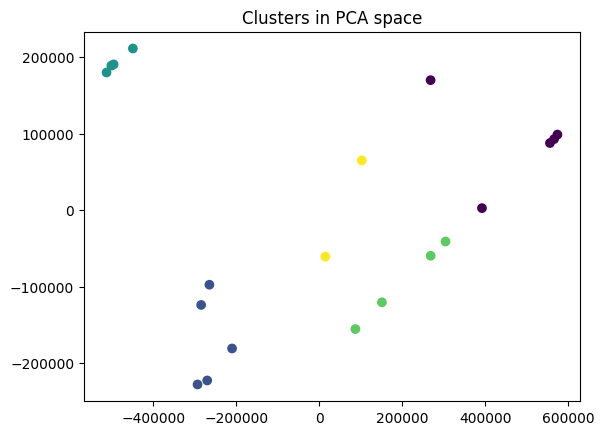

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:,0], X_pca[:,1], c=all_features['Cluster'])
plt.title("Clusters in PCA space")
plt.show()


### Cluster Visualization using PCA, UMAP and t-SNE

In [191]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [3]:
# Load your dataframe
all_features = pd.read_csv('all_features.csv')  # or however you load it

In [4]:
# Your list of sample names
sample_names = [
    'rossler', 'rossler', 'rossler', 'rossler',
    'lorenz63', 'lorenz63', 'lorenz63', 'lorenz63',
    'aizawa', 'aizawa', 'aizawa', 'aizawa',
    'dadras', 'dadras', 'dadras', 'dadras',
    'sprott', 'sprott', 'sprott', 'sprott'
]

# Add as a new column
all_features['sample_name'] = sample_names

In [5]:
# Add column first
all_features['sample_name'] = sample_names

# Reorder columns to put 'sample_name' first
cols = ['sample_name'] + [col for col in all_features.columns if col != 'sample_name']
all_features = all_features[cols]

In [6]:
all_features.head()

sample_name  y__variance_larger_than_standard_deviation  \
0     rossler                                         1.0   
1     rossler                                         1.0   
2     rossler                                         1.0   
3     rossler                                         1.0   
4    lorenz63                                         1.0   

   y__has_duplicate_max  y__has_duplicate_min  y__has_duplicate  \
0                   0.0                   0.0               0.0   
1                   0.0                   0.0               0.0   
2                   0.0                   0.0               0.0   
3                   0.0                   0.0               0.0   
4                   0.0                   0.0               0.0   

   y__sum_values  y__abs_energy  y__mean_abs_change  y__mean_change  \
0     774.013307  192383.394273            0.038264       -0.000375   
1     483.633601  209091.544304            0.040962       -0.000603   
2     592.282455  202901.126317            0.041253       -0.000080   
3     488.595747  217362.813739            0.043383       -0.000101   
4    2266.440732  573943.871589            0.314801       -0.000439   

   y__mean_second_derivative_central  ...  y__fourier_entropy__bins_5  \
0                           0.000002  ...                    0.045395   
1                           0.000004  ...                    0.045395   
2                           0.000004  ...                    0.045395   
3                           0.000005  ...                    0.045395   
4                           0.000015  ...                    0.170467   

   y__fourier_entropy__bins_10  y__fourier_entropy__bins_100  \
0                     0.125256                      0.136002   
1                     0.125256                      0.136002   
2                     0.125256                      0.136002   
3                     0.125256                      0.136002   
4                     0.260704                      0.406332   

   y__permutation_entropy__dimension_3__tau_1  \
0                                    0.718550   
1                                    0.718719   
2                                    0.718443   
3                                    0.718570   
4                                    0.812217   

   y__permutation_entropy__dimension_4__tau_1  \
0                                    0.744007   
1                                    0.744341   
2                                    0.743963   
3                                    0.744191   
4                                    0.931429   

   y__permutation_entropy__dimension_5__tau_1  \
0                                    0.769456   
1                                    0.769954   
2                                    0.769474   
3                                    0.769804   
4                                    1.052162   

   y__permutation_entropy__dimension_6__tau_1  \
0                                    0.794897   
1                                    0.795560   
2                                    0.794978   
3                                    0.795409   
4                                    1.173759   

   y__permutation_entropy__dimension_7__tau_1  \
0                                    0.820329   
1                                    0.821158   
2                                    0.820473   
3                                    0.821006   
4                                    1.297051   

   y__query_similarity_count__query_None__threshold_0.0  \
0                                                NaN      
1                                                NaN      
2                                                NaN      
3                                                NaN      
4                                                NaN      

   y__mean_n_absolute_max__number_of_maxima_7  
0                                   11.424825  
1                                   11.427862  
2      

In [7]:
all_features.isnull().sum()
# # Shows how many NaNs per column
# nan_counts = all_features.isnull().sum()

# # Filter to only columns that have at least 1 NaN
# nan_cols = nan_counts[nan_counts > 0]

# print(nan_cols)

sample_name                                              0
y__variance_larger_than_standard_deviation               0
y__has_duplicate_max                                     0
y__has_duplicate_min                                     0
y__has_duplicate                                         0
                                                        ..
y__permutation_entropy__dimension_5__tau_1               0
y__permutation_entropy__dimension_6__tau_1               0
y__permutation_entropy__dimension_7__tau_1               0
y__query_similarity_count__query_None__threshold_0.0    20
y__mean_n_absolute_max__number_of_maxima_7               0
Length: 784, dtype: int64

In [8]:
# all_features.fillna(0, inplace=True)
all_features = all_features.dropna(axis=1)

In [9]:
all_features.head()

sample_name  y__variance_larger_than_standard_deviation  \
0     rossler                                         1.0   
1     rossler                                         1.0   
2     rossler                                         1.0   
3     rossler                                         1.0   
4    lorenz63                                         1.0   

   y__has_duplicate_max  y__has_duplicate_min  y__has_duplicate  \
0                   0.0                   0.0               0.0   
1                   0.0                   0.0               0.0   
2                   0.0                   0.0               0.0   
3                   0.0                   0.0               0.0   
4                   0.0                   0.0               0.0   

   y__sum_values  y__abs_energy  y__mean_abs_change  y__mean_change  \
0     774.013307  192383.394273            0.038264       -0.000375   
1     483.633601  209091.544304            0.040962       -0.000603   
2     592.282455  202901.126317            0.041253       -0.000080   
3     488.595747  217362.813739            0.043383       -0.000101   
4    2266.440732  573943.871589            0.314801       -0.000439   

   y__mean_second_derivative_central  ...  y__fourier_entropy__bins_3  \
0                           0.000002  ...                    0.045395   
1                           0.000004  ...                    0.045395   
2                           0.000004  ...                    0.045395   
3                           0.000005  ...                    0.045395   
4                           0.000015  ...                    0.125256   

   y__fourier_entropy__bins_5  y__fourier_entropy__bins_10  \
0                    0.045395                     0.125256   
1                    0.045395                     0.125256   
2                    0.045395                     0.125256   
3                    0.045395                     0.125256   
4                    0.170467                     0.260704   

   y__fourier_entropy__bins_100  y__permutation_entropy__dimension_3__tau_1  \
0                      0.136002                                    0.718550   
1                      0.136002                                    0.718719   
2                      0.136002                                    0.718443   
3                      0.136002                                    0.718570   
4                      0.406332                                    0.812217   

   y__permutation_entropy__dimension_4__tau_1  \
0                                    0.744007   
1                                    0.744341   
2                                    0.743963   
3                                    0.744191   
4                                    0.931429   

   y__permutation_entropy__dimension_5__tau_1  \
0                                    0.769456   
1                                    0.769954   
2                                    0.769474   
3                                    0.769804   
4                                    1.052162   

   y__permutation_entropy__dimension_6__tau_1  \
0                                    0.794897   
1                                    0.795560   
2                                    0.794978   
3                                    0.795409   
4                                    1.173759   

   y__permutation_entropy__dimension_7__tau_1  \
0                                    0.820329   
1                                    0.821158   
2                                    0.820473   
3                                    0.821006   
4                                    1.297051   

   y__mean_n_absolute_max__number_of_maxima_7  
0                                   11.424825  
1                                   11.427862  
2                                   11.400400  
3                                   11.428826  
4                                   17.920598  

[5 rows x 783 columns]

In [10]:
# Separate labels and features
y_raw = all_features.iloc[:, 0].values  # labels (first column)
X = all_features.iloc[:, 1:].values     # features (rest columns)

In [11]:
X

array([[ 1.        ,  0.        ,  0.        , ...,  0.79489653,
         0.82032925, 11.42482483],
       [ 1.        ,  0.        ,  0.        , ...,  0.79555998,
         0.82115755, 11.42786209],
       [ 1.        ,  0.        ,  0.        , ...,  0.79497791,
         0.82047339, 11.40039998],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.91220671,
         0.96711818,  1.4321528 ],
       [ 0.        ,  0.        ,  0.        , ...,  0.91113205,
         0.96546751,  1.4527482 ],
       [ 0.        ,  0.        ,  0.        , ...,  0.91279824,
         0.96815074,  1.49853445]])

In [12]:
# Convert string labels to integers if needed
le = LabelEncoder()
y = le.fit_transform(y_raw)  # Now y is numeric 0,1,2,3,4

In [13]:
y_raw

array(['rossler', 'rossler', 'rossler', 'rossler', 'lorenz63', 'lorenz63',
       'lorenz63', 'lorenz63', 'aizawa', 'aizawa', 'aizawa', 'aizawa',
       'dadras', 'dadras', 'dadras', 'dadras', 'sprott', 'sprott',
       'sprott', 'sprott'], dtype=object)

In [14]:
y

array([3, 3, 3, 3, 2, 2, 2, 2, 0, 0, 0, 0, 1, 1, 1, 1, 4, 4, 4, 4])

### PCA

In [15]:
# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [16]:
# Clustering
kmeans = KMeans(n_clusters=5, random_state=0)
clusters = kmeans.fit_predict(X)

In [17]:
from matplotlib.colors import ListedColormap

my_colors = ['red', 'blue', 'green', 'purple', 'orange','black','cyan']
my_cmap = ListedColormap(my_colors)

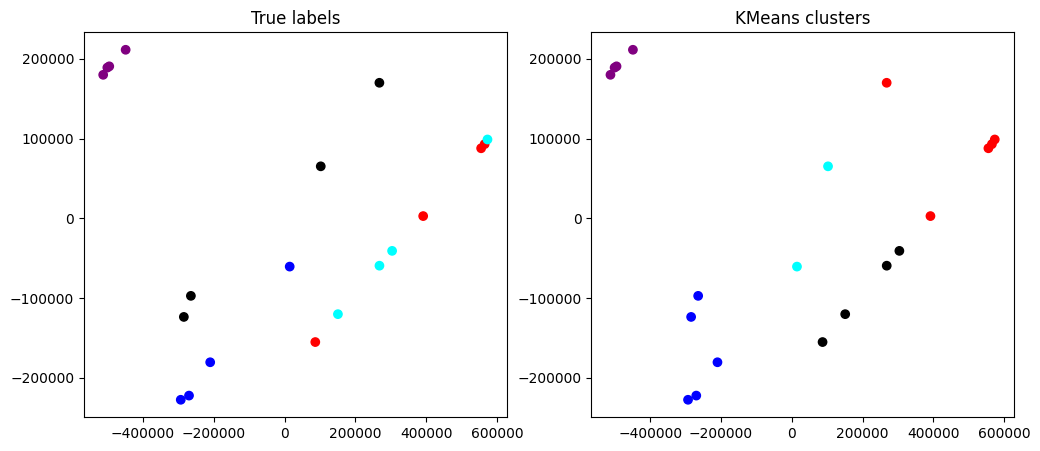

In [18]:
# Visualization: true labels vs clusters
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# True labels
axs[0].scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap = my_cmap)
axs[0].set_title("True labels")

# Clusters
axs[1].scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap = my_cmap)
axs[1].set_title("KMeans clusters")

plt.show()

In [19]:
from sklearn.preprocessing import MinMaxScaler

# After PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Scale to [0, 1]
scaler = MinMaxScaler(feature_range=(-1, 1))
X_pca_scaled = scaler.fit_transform(X_pca)


In [20]:
h = 0.02
x_min, x_max = -1, 1  # or 0, 1 depending on your range
y_min, y_max = -1, 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))


In [21]:
# KMeans clustering (unsupervised)
kmeans = KMeans(n_clusters=5, random_state=0)
clusters = kmeans.fit_predict(X)

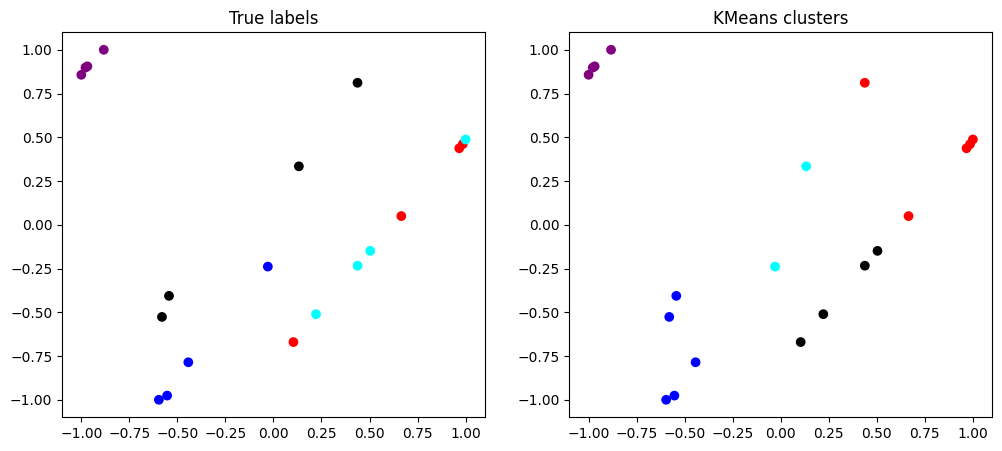

In [22]:
# Plot true labels and clusters
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].scatter(X_pca_scaled[:, 0], X_pca_scaled[:, 1], c=y, cmap=my_cmap)
axs[0].set_title("True labels")

axs[1].scatter(X_pca_scaled[:, 0], X_pca_scaled[:, 1], c=clusters, cmap=my_cmap)
axs[1].set_title("KMeans clusters")

plt.show()

In [23]:
# Train kNN classifier on scaled PCA
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_pca_scaled, y)

KNeighborsClassifier()

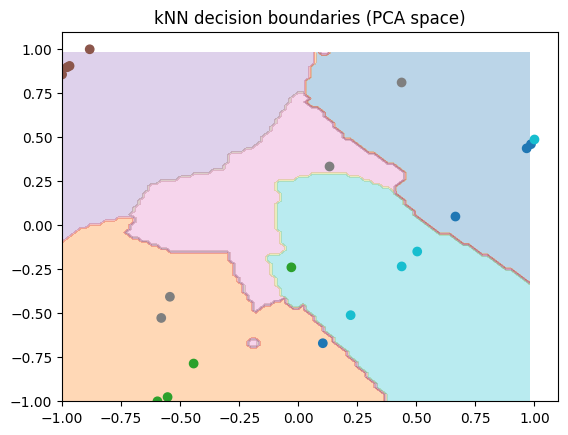

In [24]:
# Plot decision boundaries safely (fixed grid in [-1, 1])
h = 0.02
x_min, x_max = -1, 1
y_min, y_max = -1, 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='tab10')
plt.scatter(X_pca_scaled[:, 0], X_pca_scaled[:, 1], c=y, cmap='tab10')
plt.title("kNN decision boundaries (PCA space)")
plt.show()

### t-SNE

In [192]:
from sklearn.manifold import TSNE

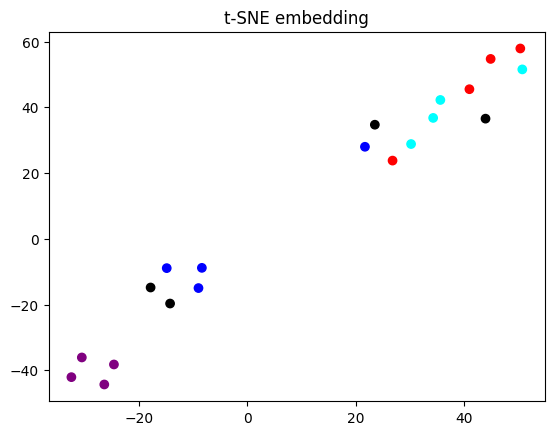

In [25]:
from sklearn.manifold import TSNE

X_tsne = TSNE(n_components=2, perplexity=5, random_state=0).fit_transform(X)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap=my_cmap)
plt.title("t-SNE embedding")
plt.show()


### UMAP

In [193]:
import umap
import matplotlib.pyplot as plt

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


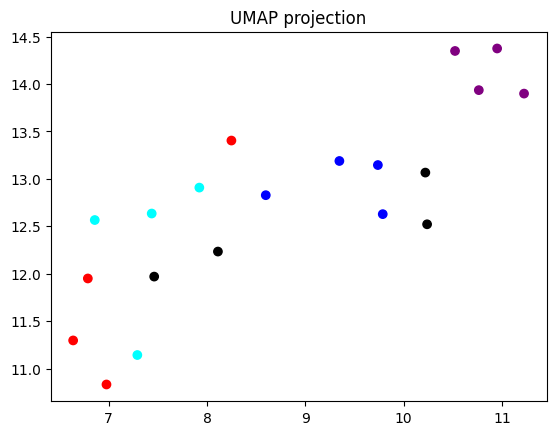

In [26]:
import umap
import matplotlib.pyplot as plt

# Fit UMAP on your features (before PCA)
reducer = umap.UMAP(random_state=0)
X_umap = reducer.fit_transform(X)

# Plot
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap=my_cmap)
plt.title("UMAP projection")
plt.show()


In [27]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X_pca_scaled, y)
print("Silhouette score:", score)


Silhouette score: 0.17864639530248722


### Feature Reduction

In [28]:
pip install mrmr_selection

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 3.0 MB/s eta 0:00:00


In [29]:
import mrmr

In [30]:
pip install pymrmr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.5/69.5 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pymrmr: filename=pymrmr-0.1.11-cp311-cp311-linux_x86_64.whl size=401299 sha256=2ef6b6885a58a6d52c0f2b2a7ab36155f21b8e97956017dcd12c5db4b496262b
  Stored in directory: /root/.cache/pip/wheels/a0/d7/97/71bca023a0dbdceab24a556649d661e71114f4eaaf4dda56d6
Successfully built pymrmr


In [31]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import VarianceThreshold
import pymrmr

# 1. Variance filtering
df = all_features.copy()

# label column
label_col = 'sample_name'

# feature columns (everything except first column)
feature_cols = df.columns[1:].tolist()
X_all = df[feature_cols].values

# Apply variance threshold
sel = VarianceThreshold(threshold=1e-2)
X_highvar = sel.fit_transform(X_all)
features_highvar = [f for f, keep in zip(feature_cols, sel.get_support()) if keep]

In [32]:
print("Features remaining after variance filtering:", len(features_highvar))

Features remaining after variance filtering: 570


In [33]:
type(features_highvar)

list

In [34]:
reduced_features = all_features[features_highvar]

In [35]:
reduced_features.head()

y__variance_larger_than_standard_deviation  y__sum_values  y__abs_energy  \
0                                         1.0     774.013307  192383.394273   
1                                         1.0     483.633601  209091.544304   
2                                         1.0     592.282455  202901.126317   
3                                         1.0     488.595747  217362.813739   
4                                         1.0    2266.440732  573943.871589   

   y__mean_abs_change  y__median   y__mean  y__standard_deviation  \
0            0.038264  -0.096896  0.077401               4.385470   
1            0.040962  -0.166466  0.048363               4.572397   
2            0.041253  -0.235208  0.059228               4.504065   
3            0.043383  -0.292160  0.048860               4.661962   
4            0.314801   0.711100  0.226644               7.572517   

   y__variation_coefficient  y__variance  y__skewness  ...  \
0                 56.658847    19.232348     0.320995  ...   
1                 94.542586    20.906815     0.259008  ...   
2                 76.045902    20.286605     0.281932  ...   
3                 95.415535    21.733894     0.271379  ...   
4                 33.411495    57.343020    -0.020090  ...   

   y__augmented_dickey_fuller__attr_"usedlag"__autolag_"AIC"  \
0                                               37.0           
1                                               38.0           
2                                               38.0           
3                                               38.0           
4                                               27.0           

   y__number_crossing_m__m_0  y__number_crossing_m__m_-1  \
0                       35.0                        29.0   
1                       35.0                        31.0   
2                       35.0                        34.0   
3                       35.0                        34.0   
4                       53.0                        59.0   

   y__number_crossing_m__m_1  y__count_above__t_0  y__count_below__t_0  \
0                       28.0               0.4768               0.5232   
1                       30.0               0.4764               0.5236   
2                       32.0               0.4740               0.5260   
3                       32.0               0.4728               0.5272   
4                       64.0               0.5290               0.4710   

   y__fourier_entropy__bins_100  y__permutation_entropy__dimension_6__tau_1  \
0                      0.136002                                    0.794897   
1                      0.136002                                    0.795560   
2                      0.136002                                    0.794978   
3                      0.136002                                    0.795409   
4                      0.406332                                    1.173759   

   y__permutation_entropy__dimension_7__tau_1  \
0                                    0.820329   
1                                    0.821158   
2                                    0.820473   
3                                    0.821006   
4                                    1.297051   

   y__mean_n_absolute_max__number_of_maxima_7  
0                                   11.424825  
1                                   11.427862  
2                                   11.400400  
3                                   11.428826  
4                                   17.920598  

[5 rows x 570 columns]

In [37]:
# Separate labels and features
y_raw = all_features.iloc[:, 0].values  # labels (first column)
X = reduced_features.iloc[:, 1:].values     # features (rest columns)

In [38]:
# Convert string labels to integers if needed
le = LabelEncoder()
y = le.fit_transform(y_raw)  # Now y is numeric 0,1,2,3,4

In [ ]:
from matplotlib.colors import ListedColormap

my_colors = ['red', 'blue', 'green', 'purple', 'orange','black','cyan']
my_cmap = ListedColormap(my_colors)

### PCA

In [39]:
# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

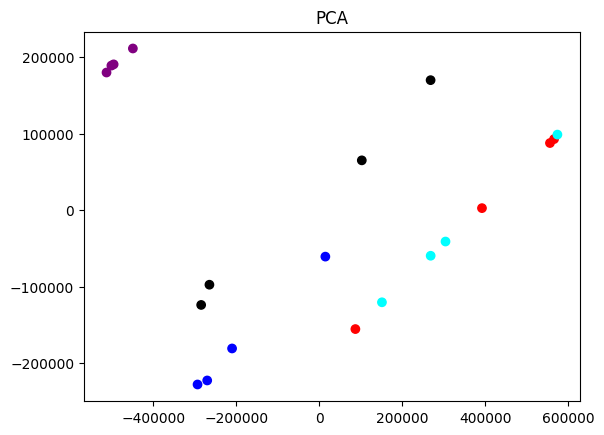

In [109]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=my_cmap)
plt.title("PCA")
plt.show()

### t-SNE

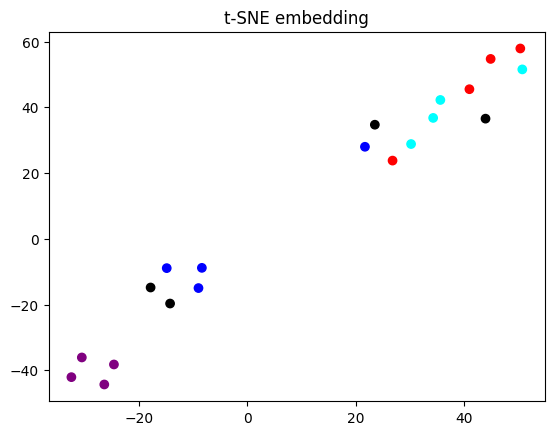

In [43]:
from sklearn.manifold import TSNE

X_tsne = TSNE(n_components=2, perplexity=5, random_state=0).fit_transform(X)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap=my_cmap)
plt.title("t-SNE embedding")
plt.show()


### UMAP

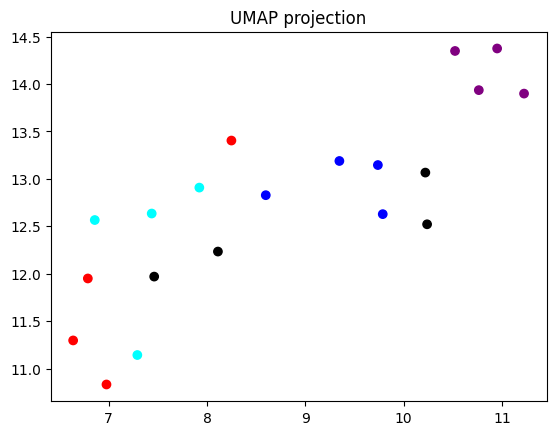

In [44]:
import umap
import matplotlib.pyplot as plt

# Fit UMAP on your features (before PCA)
reducer = umap.UMAP(random_state=0)
X_umap = reducer.fit_transform(X)

# Plot
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap=my_cmap)
plt.title("UMAP projection")
plt.show()


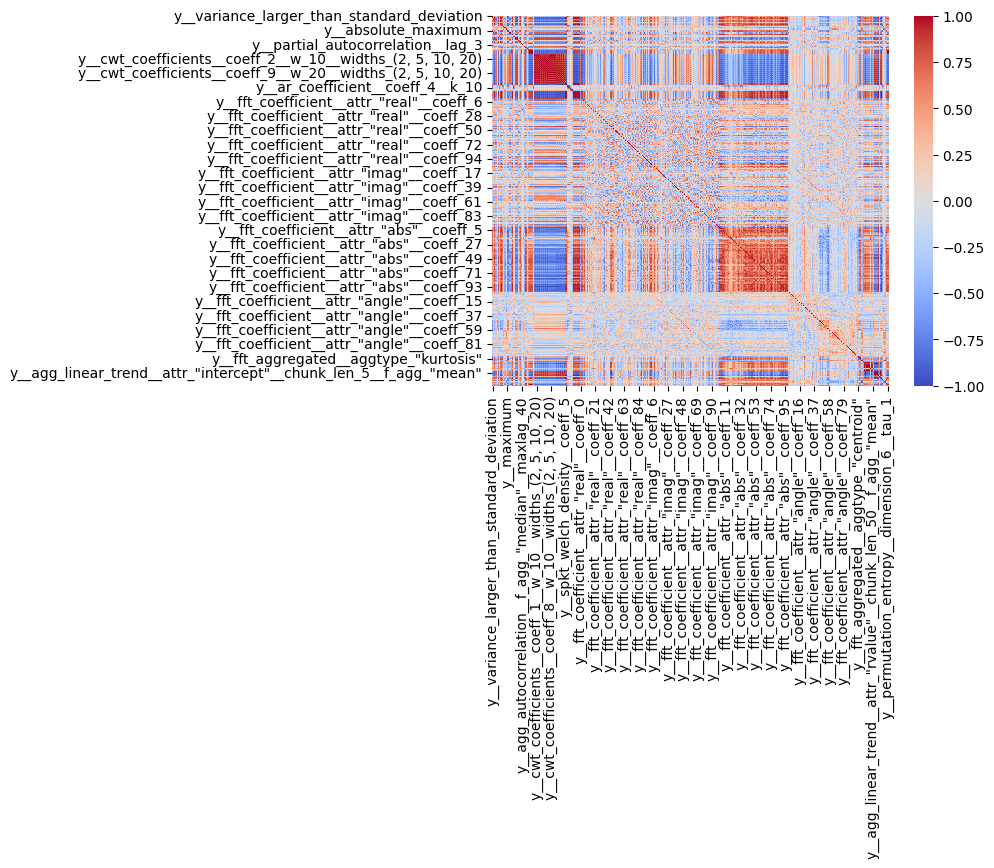

In [48]:
corr = reduced_features.corr()

# Visualize (optional)
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.show()


In [82]:
X

array([[7.74013307e+02, 1.92383394e+05, 3.82637806e-02, ...,
        7.94896533e-01, 8.20329253e-01, 1.14248248e+01],
       [4.83633601e+02, 2.09091544e+05, 4.09623381e-02, ...,
        7.95559976e-01, 8.21157550e-01, 1.14278621e+01],
       [5.92282455e+02, 2.02901126e+05, 4.12532998e-02, ...,
        7.94977911e-01, 8.20473388e-01, 1.14004000e+01],
       ...,
       [6.76591359e+03, 5.68273847e+03, 7.73937999e-03, ...,
        9.12206708e-01, 9.67118177e-01, 1.43215280e+00],
       [6.76789994e+03, 5.68086902e+03, 7.64393908e-03, ...,
        9.11132054e-01, 9.65467514e-01, 1.45274820e+00],
       [6.73858575e+03, 5.62418078e+03, 7.24074824e-03, ...,
        9.12798239e-01, 9.68150737e-01, 1.49853445e+00]])

In [83]:
import pandas as pd
import numpy as np
import re

# Suppose you have your tsfresh feature DataFrame
X_raw = pd.read_csv("all_features.csv")  # or however you have it

In [93]:
X_raw

y__variance_larger_than_standard_deviation  y__has_duplicate_max  \
0                                          1.0                   0.0   
1                                          1.0                   0.0   
2                                          1.0                   0.0   
3                                          1.0                   0.0   
4                                          1.0                   0.0   
5                                          1.0                   0.0   
6                                          1.0                   0.0   
7                                          1.0                   0.0   
8                                          0.0                   0.0   
9                                          0.0                   0.0   
10                                         0.0                   0.0   
11                                         0.0                   0.0   
12                                         1.0                   0.0   
13                                         1.0                   0.0   
14                                         1.0                   0.0   
15                                         1.0                   0.0   
16                                         0.0                   0.0   
17                                         0.0                   0.0   
18                                         0.0                   0.0   
19                                         0.0                   0.0   

    y__has_duplicate_min  y__has_duplicate  y__sum_values  y__abs_energy  \
0                    0.0               0.0     774.013307  192383.394273   
1                    0.0               0.0     483.633601  209091.544304   
2                    0.0               0.0     592.282455  202901.126317   
3                    0.0               0.0     488.595747  217362.813739   
4                    0.0               0.0    2266.440732  573943.871589   
5                    0.0               0.0  -14793.727883  576901.035968   
6                    0.0               0.0  -24076.622032  573953.574115   
7                    0.0               0.0   -6907.638883  576236.975733   
8                    0.0               0.0     -72.283197    3418.240633   
9                    0.0               0.0     -43.506792    3504.589577   
10                   0.0               0.0    -140.159771    3545.483916   
11                   0.0               0.0    -135.373152    3558.046180   
12                   0.0               0.0    6838.479121  108272.229482   
13                   0.0               0.0    8321.485449  121099.441851   
14                   0.0               0.0   11890.717668  118213.104182   
15                   0.0               0.0   10534.263866  114793.988902   
16                   0.0               0.0    6727.122841    5622.615594   
17                   0.0               0.0    6765.913589    5682.738466   
18                   0.0               0.0    6767.899937    5680.869023   
19                   0.0               0.0    6738.585751    5624.180783   

    y__mean_abs_change  y__mean_change  y__mean_second_derivative_central  \
0             0.038264       -0.000375                       2.156915e-06   
1             0.040962       -0.000603                       3.655258e-06   
2             0.041253       -0.000080                       3.940044e-06   
3             0.043383       -0.000101                       4.801478e-06   
4             0.314801       -0.000439                       1.473376e-05   
5             0.308808        0.000265                      -1.775693e-05   
6             0.314218       -0.000197                      -5.741740e-06   
7             0.304367        0.000245                       1.132474e-05   
8             0.016620       -0.000117                       2.005318e-06   
9             0.017079       -0.000053                       1.141968e-06   
10            0.017359       -0.000136         

In [101]:
columns_list = X_raw.columns.to_list()

In [102]:
columns_list

['y__variance_larger_than_standard_deviation',
 'y__has_duplicate_max',
 'y__has_duplicate_min',
 'y__has_duplicate',
 'y__sum_values',
 'y__abs_energy',
 'y__mean_abs_change',
 'y__mean_change',
 'y__mean_second_derivative_central',
 'y__median',
 'y__mean',
 'y__length',
 'y__standard_deviation',
 'y__variation_coefficient',
 'y__variance',
 'y__skewness',
 'y__kurtosis',
 'y__root_mean_square',
 'y__absolute_sum_of_changes',
 'y__longest_strike_below_mean',
 'y__longest_strike_above_mean',
 'y__count_above_mean',
 'y__count_below_mean',
 'y__last_location_of_maximum',
 'y__first_location_of_maximum',
 'y__last_location_of_minimum',
 'y__first_location_of_minimum',
 'y__percentage_of_reoccurring_values_to_all_values',
 'y__percentage_of_reoccurring_datapoints_to_all_datapoints',
 'y__sum_of_reoccurring_values',
 'y__sum_of_reoccurring_data_points',
 'y__ratio_value_number_to_time_series_length',
 'y__sample_entropy',
 'y__maximum',
 'y__absolute_maximum',
 'y__minimum',
 'y__benford_

In [84]:
# Extract feature families from column names
def get_family(feature_name):
    return feature_name.split("__")[0]

families = X_raw.columns.map(get_family)
unique_families = families.unique()

In [85]:
# Aggregate features per family (mean aggregation)
agg_features = {}

for fam in unique_families:
    fam_cols = X_raw.columns[families == fam]
    fam_mean = X_raw[fam_cols].mean(axis=1)
    agg_features[fam] = fam_mean

In [92]:
families

Index(['y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y',
       ...
       'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y'],
      dtype='object', length=783)

In [94]:
unique_families

Index(['y'], dtype='object')

In [86]:
# Build the new aggregated feature set
X_agg = pd.DataFrame(agg_features)

In [87]:
print(X_agg.shape)
print(X_agg.head())

(20, 1)
             y
0  1136.000129
1  1389.485890
2   618.579863
3   674.052142
4  1429.548860


In [90]:
X_agg

y
0   1136.000129
1   1389.485890
2    618.579863
3    674.052142
4   1429.548860
5   1495.080868
6   1397.366224
7   1405.337355
8   1093.312929
9    661.491330
10  1331.376987
11  1344.451449
12   577.414011
13   978.161836
14   719.050363
15   587.244810
16  1382.150263
17   997.292947
18   779.412857
19   945.160926

### Cluster Network

In [163]:
import pandas as pd

In [164]:
X_raw = pd.read_csv("all_features.csv")  # or however you have it

In [165]:
X_raw.head()

y__variance_larger_than_standard_deviation  y__has_duplicate_max  \
0                                         1.0                   0.0   
1                                         1.0                   0.0   
2                                         1.0                   0.0   
3                                         1.0                   0.0   
4                                         1.0                   0.0   

   y__has_duplicate_min  y__has_duplicate  y__sum_values  y__abs_energy  \
0                   0.0               0.0     774.013307  192383.394273   
1                   0.0               0.0     483.633601  209091.544304   
2                   0.0               0.0     592.282455  202901.126317   
3                   0.0               0.0     488.595747  217362.813739   
4                   0.0               0.0    2266.440732  573943.871589   

   y__mean_abs_change  y__mean_change  y__mean_second_derivative_central  \
0            0.038264       -0.000375                           0.000002   
1            0.040962       -0.000603                           0.000004   
2            0.041253       -0.000080                           0.000004   
3            0.043383       -0.000101                           0.000005   
4            0.314801       -0.000439                           0.000015   

   y__median  ...  y__fourier_entropy__bins_5  y__fourier_entropy__bins_10  \
0  -0.096896  ...                    0.045395                     0.125256   
1  -0.166466  ...                    0.045395                     0.125256   
2  -0.235208  ...                    0.045395                     0.125256   
3  -0.292160  ...                    0.045395                     0.125256   
4   0.711100  ...                    0.170467                     0.260704   

   y__fourier_entropy__bins_100  y__permutation_entropy__dimension_3__tau_1  \
0                      0.136002                                    0.718550   
1                      0.136002                                    0.718719   
2                      0.136002                                    0.718443   
3                      0.136002                                    0.718570   
4                      0.406332                                    0.812217   

   y__permutation_entropy__dimension_4__tau_1  \
0                                    0.744007   
1                                    0.744341   
2                                    0.743963   
3                                    0.744191   
4                                    0.931429   

   y__permutation_entropy__dimension_5__tau_1  \
0                                    0.769456   
1                                    0.769954   
2                                    0.769474   
3                                    0.769804   
4                                    1.052162   

   y__permutation_entropy__dimension_6__tau_1  \
0                                    0.794897   
1                                    0.795560   
2                                    0.794978   
3                                    0.795409   
4                                    1.173759   

   y__permutation_entropy__dimension_7__tau_1  \
0                                    0.820329   
1                                    0.821158   
2                                    0.820473   
3                                    0.821006   
4                                    1.297051   

   y__query_similarity_count__query_None__threshold_0.0  \
0                                                NaN      
1                                                NaN      
2                                                NaN      
3                                                NaN      
4                                                NaN      

   y__mean_n_absolute_max__number_of_maxima_7  
0                                   11.424825  
1                                   11.427862  
2                                   11.400400

In [166]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold
import numpy as np

# X is your DF of shape (20, ~788)
X = X_raw.copy()

# 1. Use MinMaxScaler to normalize each feature to range [0, 1]
scaler = MinMaxScaler()
X_mm = scaler.fit_transform(X)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/_array_api.py:776: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
/usr/local/lib/python3.11/dist-packages/sklearn/utils/_array_api.py:793: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmax(X, axis=axis))


In [167]:
# Optionally wrap back to DataFrame to keep column names:
X_mm = pd.DataFrame(X_mm, index=X.index, columns=X.columns)

In [168]:
X_mm.head()

y__variance_larger_than_standard_deviation  y__has_duplicate_max  \
0                                         1.0                   0.0   
1                                         1.0                   0.0   
2                                         1.0                   0.0   
3                                         1.0                   0.0   
4                                         1.0                   0.0   

   y__has_duplicate_min  y__has_duplicate  y__sum_values  y__abs_energy  \
0                   0.0               0.0       0.690922       0.329504   
1                   0.0               0.0       0.682849       0.358639   
2                   0.0               0.0       0.685870       0.347845   
3                   0.0               0.0       0.682987       0.373062   
4                   0.0               0.0       0.732416       0.994843   

   y__mean_abs_change  y__mean_change  y__mean_second_derivative_central  \
0            0.100868        0.292482                           0.612909   
1            0.109642        0.040795                           0.659025   
2            0.110588        0.618294                           0.667791   
3            0.117514        0.595288                           0.694304   
4            1.000000        0.221744                           1.000000   

   y__median  ...  y__fourier_entropy__bins_5  y__fourier_entropy__bins_10  \
0   0.770285  ...                    0.000000                     0.000000   
1   0.752696  ...                    0.000000                     0.000000   
2   0.735316  ...                    0.000000                     0.000000   
3   0.720917  ...                    0.000000                     0.000000   
4   0.974566  ...                    0.784273                     0.926492   

   y__fourier_entropy__bins_100  y__permutation_entropy__dimension_3__tau_1  \
0                           0.0                                    0.001058   
1                           0.0                                    0.002732   
2                           0.0                                    0.000000   
3                           0.0                                    0.001253   
4                           1.0                                    0.928454   

   y__permutation_entropy__dimension_4__tau_1  \
0                                    0.000216   
1                                    0.001853   
2                                    0.000000   
3                                    0.001118   
4                                    0.919137   

   y__permutation_entropy__dimension_5__tau_1  \
0                                    0.000000   
1                                    0.001620   
2                                    0.000061   
3                                    0.001131   
4                                    0.918532   

   y__permutation_entropy__dimension_6__tau_1  \
0                                    0.000000   
1                                    0.001604   
2                                    0.000197   
3                                    0.001239   
4                                    0.916090   

   y__permutation_entropy__dimension_7__tau_1  \
0                                    0.000000   
1                                    0.001586   
2                                    0.000276   
3                                    0.001296   
4                                    0.912988   

   y__query_similarity_count__query_None__threshold_0.0  \
0                                                NaN      
1                                                NaN      
2                                                NaN      
3                                                NaN      
4                                                NaN      

   y__mean_n_absolute_max__number_of_maxima_7  
0                                    0.606041  
1                                    0.606225  
2                                    0.604560

In [169]:
# 2. Compute variances
vars = X_mm.var(axis=0)
vars.describe()  # check distribution

count    782.000000
mean       0.079382
std        0.039239
min        0.000000
25%        0.051957
50%        0.079005
75%        0.105225
max        0.252632
dtype: float64

In [173]:
# 3. Choose a threshold
# e.g. only keep features with variance > 0.005
threshold = 0.1

In [174]:
# 4. Apply VarianceThreshold
sel = VarianceThreshold(threshold=threshold)
X_highvar = sel.fit_transform(X_mm)
features_highvar = [f for f, keep in zip(X.columns, sel.get_support()) if keep]

/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_variance_threshold.py:114: RuntimeWarning: Degrees of freedom <= 0 for slice.
  self.variances_ = np.nanvar(X, axis=0)


In [175]:
print(f"Features kept: {len(features_highvar)} (threshold={threshold})")

Features kept: 194 (threshold=0.1)


In [176]:
X_filtered_step_1 = X_mm[features_highvar]

In [177]:
X_filtered_step_1.head()

y__variance_larger_than_standard_deviation  y__abs_energy  \
0                                         1.0       0.329504   
1                                         1.0       0.358639   
2                                         1.0       0.347845   
3                                         1.0       0.373062   
4                                         1.0       0.994843   

   y__mean_abs_change  y__standard_deviation  y__variance  \
0            0.100868               0.560005     0.334133   
1            0.109642               0.585812     0.363389   
2            0.110588               0.576378     0.352553   
3            0.117514               0.598177     0.377840   
4            1.000000               1.000000     1.000000   

   y__root_mean_square  y__absolute_sum_of_changes  \
0             0.542239                    0.100868   
1             0.568841                    0.109642   
2             0.559113                    0.110588   
3             0.581616                    0.117514   
4             0.997220                    1.000000   

   y__longest_strike_below_mean  y__longest_strike_above_mean  \
0                      0.145520                      0.317221   
1                      0.122216                      0.318731   
2                      0.120663                      0.318731   
3                      0.117038                      0.320242   
4                      1.000000                      0.613293   

   y__sample_entropy  ...  \
0           0.000000  ...   
1           0.027369  ...   
2           0.044054  ...   
3           0.050917  ...   
4           0.905891  ...   

   y__energy_ratio_by_chunks__num_segments_10__segment_focus_0  \
0                                           0.000000             
1                                           0.003889             
2                                           0.010698             
3                                           0.018355             
4                                           0.991103             

   y__ratio_beyond_r_sigma__r_2  y__ratio_beyond_r_sigma__r_2.5  \
0                      0.552672                        0.105442   
1                      0.322137                        0.000000   
2                      0.375573                        0.051020   
3                      0.267176                        0.000000   
4                      0.000000                        0.000000   

   y__ratio_beyond_r_sigma__r_3  y__lempel_ziv_complexity__bins_3  \
0                           0.0                          0.208333   
1                           0.0                          0.243056   
2                           0.0                          0.256944   
3                           0.0                          0.284722   
4                           0.0                          0.923611   

   y__lempel_ziv_complexity__bins_10  y__fourier_entropy__bins_2  \
0                           0.140039                         0.0   
1                           0.151874                         0.0   
2                           0.167653                         0.0   
3                           0.191321                         0.0   
4                           0.946746                         1.0   

   y__fourier_entropy__bins_10  y__fourier_entropy__bins_100  \
0                     0.000000                           0.0   
1                     0.000000                           0.0   
2                     0.000000                           0.0   
3                     0.000000                           0.0   
4                     0.926492                           1.0   

   y__mean_n_absolute_max__number_of_maxima_7  
0                                    0.606041  
1                                    0.606225  
2                                    0.604560  
3                                    0.606284  
4                                    1.000000  

[5 rows x 194 columns]

In [178]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.preprocessing import StandardScaler

# 1️⃣ Assume X_raw (20×788) is your tsfresh dataframe
X = X_filtered_step_1.copy()

In [179]:
# 2️⃣ Standardize features
Xz = pd.DataFrame(
    StandardScaler().fit_transform(X),
    index=X.index, columns=X.columns
)

In [180]:
# 3️⃣ Compute Spearman correlation distance matrix
corr = Xz.corr(method="spearman").abs()
dist = 1 - corr

In [181]:
# 4️⃣ Convert to condensed distance for clustering
from scipy.spatial.distance import squareform
dist_condensed = squareform(dist.values, checks=False)

In [182]:
#dist_condensed_clean = dist_condensed[~np.isnan(dist_condensed)]
dist_condensed_filled = np.nan_to_num(dist_condensed, nan = 0.0)

In [183]:
# 5️⃣ Hierarchical clustering (ward or average linkage)
Z = linkage(dist_condensed_filled, method="average")

In [184]:
# 6️⃣ Determine clusters by thresholding distance
# Adjust threshold to yield ~100 clusters
threshold = 0.5
clusters = fcluster(Z, t=threshold, criterion='distance')

In [185]:
len(clusters)

194

In [186]:
# 7️⃣ Build cluster → feature mapping
cluster_df = pd.DataFrame({
    'feature': X.columns,
    'cluster': clusters
})
n_clusters = cluster_df['cluster'].nunique()
print(f"{n_clusters} clusters found.")

27 clusters found.


In [187]:
# 8️⃣ Choose representative per cluster (e.g. highest variance)
rep_features = []
for cl in np.unique(clusters):
    members = cluster_df[cluster_df.cluster == cl].feature
    variances = Xz[members].var(axis=0)
    best = variances.idxmax()
    rep_features.append(best)

print(f"{len(rep_features)} representative features selected.")

27 representative features selected.


In [188]:
# 9️⃣ Filtered data
X_rep = X[rep_features]

In [198]:
X_rep.head()

y__fft_coefficient__attr_"angle"__coeff_1  \
0                                   0.879402   
1                                   0.934719   
2                                   0.950701   
3                                   0.968099   
4                                   0.899202   

   y__fft_coefficient__attr_"angle"__coeff_90  \
0                                    0.242341   
1                                    0.590160   
2                                    0.968636   
3                                    0.000000   
4                                    0.107240   

   y__fft_coefficient__attr_"angle"__coeff_45  \
0                                    0.055813   
1                                    0.595390   
2                                    0.250044   
3                                    0.415438   
4                                    0.304170   

   y__fft_coefficient__attr_"angle"__coeff_60  \
0                                    0.173000   
1                                    0.803596   
2                                    0.633037   
3                                    0.286226   
4                                    0.883527   

   y__fft_coefficient__attr_"angle"__coeff_53  \
0                                    0.000000   
1                                    0.177980   
2                                    0.334856   
3                                    0.371188   
4                                    0.046070   

   y__cwt_coefficients__coeff_10__w_20__widths_(2, 5, 10, 20)  \
0                                           0.939860            
1                                           0.951191            
2                                           0.962540            
3                                           0.973910            
4                                           0.000000            

   y__fft_coefficient__attr_"angle"__coeff_65  \
0                                    0.588829   
1                                    0.450762   
2                                    0.015818   
3                                    0.461170   
4                                    0.501571   

   y__change_quantiles__f_agg_"mean"__isabs_False__qh_0.4__ql_0.0  \
0                                           0.488583                
1                                           0.264777                
2                                           0.935227                
3                                           0.919251                
4                                           0.074023                

   y__fft_coefficient__attr_"abs"__coeff_75  \
0                                  0.013108   
1                                  0.039232   
2                                  0.033258   
3                                  0.046200   
4                                  1.000000   

   y__fft_coefficient__attr_"angle"__coeff_48  ...  \
0                                    0.441989  ...   
1                                    0.327711  ...   
2                                    0.768126  ...   
3                                    0.243952  ...   
4                                    0.279135  ...   

   y__fft_coefficient__attr_"angle"__coeff_88  \
0                                    0.207459   
1                                    0.295341   
2                                    0.625658   
3                                    0.726497   
4                                    0.012286   

   y__fft_coefficient__attr_"angle"__coeff_85  \
0                                    0.000000   
1                                    0.113353   
2                                    0.580859   
3                                    0.974111   
4                                    0.215359   

   y__fft_coefficient__attr_"angle"__coeff_36  \
0                                    0.797311   
1                                    0.969879   
2                                    0.034062   
3                                    0.

In [199]:
sample_names = [
    'rossler', 'rossler', 'rossler', 'rossler',
    'lorenz63', 'lorenz63', 'lorenz63', 'lorenz63',
    'aizawa', 'aizawa', 'aizawa', 'aizawa',
    'dadras', 'dadras', 'dadras', 'dadras',
    'sprott', 'sprott', 'sprott', 'sprott'
]

# Add as a new column
X_rep['sample_name'] = sample_names

<ipython-input-199-3829804289>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_rep['sample_name'] = sample_names


In [200]:
# Reorder columns to put 'sample_name' first
cols = ['sample_name'] + [col for col in X_rep.columns if col != 'sample_name']
X_rep = X_rep[cols]

In [319]:
X_rep.head()

sample_name  y__fft_coefficient__attr_"angle"__coeff_1  \
0     rossler                                   0.879402   
1     rossler                                   0.934719   
2     rossler                                   0.950701   
3     rossler                                   0.968099   
4    lorenz63                                   0.899202   

   y__fft_coefficient__attr_"angle"__coeff_90  \
0                                    0.242341   
1                                    0.590160   
2                                    0.968636   
3                                    0.000000   
4                                    0.107240   

   y__fft_coefficient__attr_"angle"__coeff_45  \
0                                    0.055813   
1                                    0.595390   
2                                    0.250044   
3                                    0.415438   
4                                    0.304170   

   y__fft_coefficient__attr_"angle"__coeff_60  \
0                                    0.173000   
1                                    0.803596   
2                                    0.633037   
3                                    0.286226   
4                                    0.883527   

   y__fft_coefficient__attr_"angle"__coeff_53  \
0                                    0.000000   
1                                    0.177980   
2                                    0.334856   
3                                    0.371188   
4                                    0.046070   

   y__cwt_coefficients__coeff_10__w_20__widths_(2, 5, 10, 20)  \
0                                           0.939860            
1                                           0.951191            
2                                           0.962540            
3                                           0.973910            
4                                           0.000000            

   y__fft_coefficient__attr_"angle"__coeff_65  \
0                                    0.588829   
1                                    0.450762   
2                                    0.015818   
3                                    0.461170   
4                                    0.501571   

   y__change_quantiles__f_agg_"mean"__isabs_False__qh_0.4__ql_0.0  \
0                                           0.488583                
1                                           0.264777                
2                                           0.935227                
3                                           0.919251                
4                                           0.074023                

   y__fft_coefficient__attr_"abs"__coeff_75  ...  \
0                                  0.013108  ...   
1                                  0.039232  ...   
2                                  0.033258  ...   
3                                  0.046200  ...   
4                                  1.000000  ...   

   y__fft_coefficient__attr_"angle"__coeff_88  \
0                                    0.207459   
1                                    0.295341   
2                                    0.625658   
3                                    0.726497   
4                                    0.012286   

   y__fft_coefficient__attr_"angle"__coeff_85  \
0                                    0.000000   
1                                    0.113353   
2                                    0.580859   
3                                    0.974111   
4                                    0.215359   

   y__fft_coefficient__attr_"angle"__coeff_36  \
0                                    0.797311   
1                                    0.969879   
2                                    0.034062   
3                                    0.086970   
4                                    0.000000   

   y__fft_coefficient__attr_"angle"__coeff_73  \
0                                    0.284769   
1                                    0.442425   
2              

In [202]:
# Separate labels and features
y_raw = X_rep.iloc[:, 0].values  # labels (first column)
X = X_rep.iloc[:, 1:].values     # features (rest columns)
# Convert string labels to integers if needed
le = LabelEncoder()
y = le.fit_transform(y_raw)  # Now y is numeric 0,1,2,3,4

In [206]:
from matplotlib.colors import ListedColormap

my_colors = ['red', 'blue', 'green', 'purple', 'orange','black','cyan']
my_cmap = ListedColormap(my_colors)

### PCA

In [204]:
# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

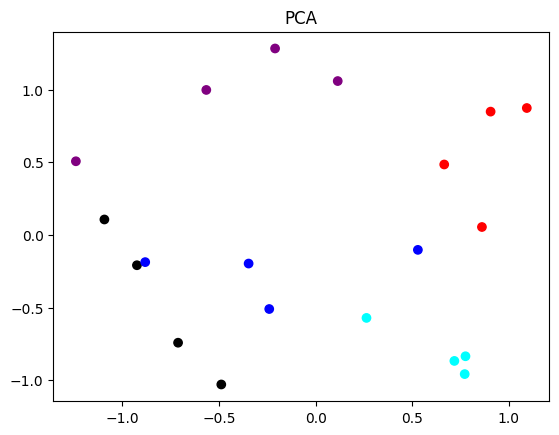

In [207]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=my_cmap)
plt.title("PCA")
plt.show()

### t-SNE

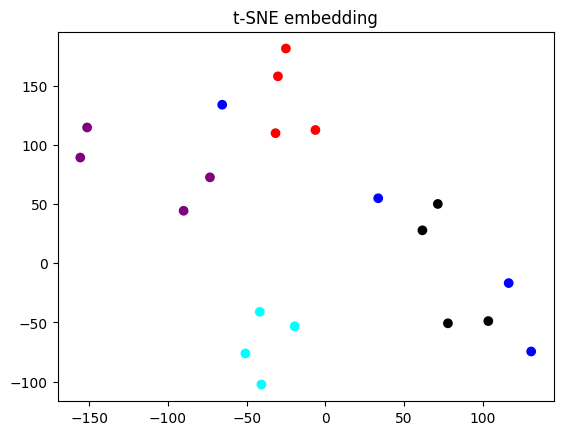

In [209]:
from sklearn.manifold import TSNE

X_tsne = TSNE(n_components=2, perplexity=5, random_state=0).fit_transform(X)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap=my_cmap)
plt.title("t-SNE embedding")
plt.show()


### UMAP

In [ ]:
import umap
import matplotlib.pyplot as plt

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


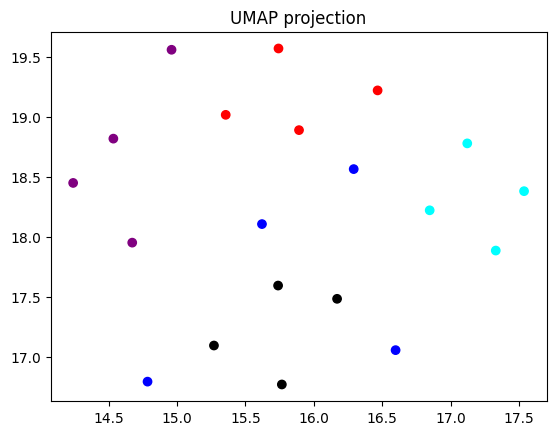

In [211]:
# Fit UMAP on your features (before PCA)
reducer = umap.UMAP(random_state=0)
X_umap = reducer.fit_transform(X)

# Plot
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap=my_cmap)
plt.title("UMAP projection")
plt.show()


### Cluster + mrMR

In [43]:
X_rep.head()

y__large_standard_deviation__r_0.25  \
0                                  0.0   
1                                  0.0   
2                                  0.0   
3                                  0.0   
4                                  0.0   

   y__friedrich_coefficients__coeff_1__m_3__r_30  \
0                                   1.029655e-05   
1                                   1.097308e-05   
2                                  -1.715260e-06   
3                                   9.107691e-09   
4                                  -1.951087e-06   

   y__fft_coefficient__attr_"real"__coeff_68  \
0                                  82.432386   
1                                  44.814173   
2                                  77.297171   
3                                  36.575310   
4                                 676.851111   

   y__fft_coefficient__attr_"real"__coeff_40  \
0                                -400.035653   
1                                 301.502058   
2                                 122.044389   
3                                  78.091291   
4                               -4248.030155   

   y__fft_coefficient__attr_"real"__coeff_62  \
0                                -187.367571   
1                                 126.898282   
2                                 -54.405236   
3                                 140.109378   
4                               -1844.873353   

   y__fft_coefficient__attr_"angle"__coeff_21  \
0                                  -37.483681   
1                                  -72.605521   
2                                  -22.122280   
3                                  -10.796859   
4                                    9.379908   

   y__fft_coefficient__attr_"imag"__coeff_21  \
0                                -533.632659   
1                               -1232.301441   
2                                -919.701502   
3                                -629.938559   
4                                 502.546870   

   y__fft_coefficient__attr_"real"__coeff_98  \
0                                 -63.910755   
1                                 -53.946628   
2                                 -47.010971   
3                                  18.918493   
4                                -977.929395   

   y__fft_coefficient__attr_"imag"__coeff_40  \
0                                  72.493922   
1                                -832.300480   
2                                 246.906713   
3                                  58.764250   
4                                -325.903518   

   y__fft_coefficient__attr_"angle"__coeff_9  ...  \
0                                  68.743390  ...   
1                                -165.551815  ...   
2                                 165.401768  ...   
3                                 100.057377  ...   
4                                 -90.574202  ...   

   y__fft_coefficient__attr_"imag"__coeff_34  \
0                                 348.337961   
1                                 335.094358   
2                                 915.736378   
3                                 878.254171   
4                                -242.021031   

   y__fft_coefficient__attr_"real"__coeff_14  y__skewness  \
0                                -995.039299     0.320995   
1                                 525.489648     0.259008   
2                               -1548.139697     0.281932   
3                               -1169.526388     0.271379   
4                               -2285.512199    -0.020090   

   y__fft_coefficient__attr_"angle"__coeff_71  y__ratio_beyond_r_sigma__r_1.5  \
0                                  -15.544448                          0.1674   
1                                   67.149415                          0.1602   
2                                  161.533601                          0.1496   
3                                 -174.231008                          0.1545   
4                           

In [64]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import VarianceThreshold
#import pymrmr

# 1. Variance filtering
df = X_rep.copy()

# label column
label_col = 'sample_name'

# feature columns (everything except first column)
#feature_cols = df.columns[1:].tolist()
feature_cols = df.columns.tolist()
X_all = df[feature_cols].values

# Apply variance threshold
sel = VarianceThreshold(threshold=1e-1)
X_highvar = sel.fit_transform(X_all)
features_highvar = [f for f, keep in zip(feature_cols, sel.get_support()) if keep]

In [65]:
len(features_highvar)

178

In [50]:
sample_names = [
    'rossler', 'rossler', 'rossler', 'rossler',
    'lorenz63', 'lorenz63', 'lorenz63', 'lorenz63',
    'aizawa', 'aizawa', 'aizawa', 'aizawa',
    'dadras', 'dadras', 'dadras', 'dadras',
    'sprott', 'sprott', 'sprott', 'sprott'
]

# Add as a new column
df['sample_name'] = sample_names

In [51]:
# Add column first
df['sample_name'] = sample_names

# Reorder columns to put 'sample_name' first
cols = ['sample_name'] + [col for col in df.columns if col != 'sample_name']
df = df[cols]

In [52]:
df

sample_name  y__large_standard_deviation__r_0.25  \
0      rossler                                  0.0   
1      rossler                                  0.0   
2      rossler                                  0.0   
3      rossler                                  0.0   
4     lorenz63                                  0.0   
5     lorenz63                                  0.0   
6     lorenz63                                  0.0   
7     lorenz63                                  0.0   
8       aizawa                                  0.0   
9       aizawa                                  0.0   
10      aizawa                                  0.0   
11      aizawa                                  0.0   
12      dadras                                  0.0   
13      dadras                                  0.0   
14      dadras                                  0.0   
15      dadras                                  0.0   
16      sprott                                  0.0   
17      sprott                                  1.0   
18      sprott                                  0.0   
19      sprott                                  0.0   

    y__friedrich_coefficients__coeff_1__m_3__r_30  \
0                                    1.029655e-05   
1                                    1.097308e-05   
2                                   -1.715260e-06   
3                                    9.107691e-09   
4                                   -1.951087e-06   
5                                    3.351562e-06   
6                                    1.249768e-05   
7                                   -5.120613e-06   
8                                    2.534750e-05   
9                                    9.658668e-05   
10                                  -5.462563e-08   
11                                   2.082824e-06   
12                                   9.843636e-06   
13                                  -4.819625e-07   
14                                   5.370837e-05   
15                                   2.159667e-05   
16                                  -9.762801e-05   
17                                  -3.815087e-04   
18                                  -1.295974e-03   
19                                   5.636419e-04   

    y__fft_coefficient__attr_"real"__coeff_68  \
0                                   82.432386   
1                                   44.814173   
2                                   77.297171   
3                                   36.575310   
4                                  676.851111   
5                                  323.246212   
6                                -3281.215601   
7                                  -70.361144   
8                                   96.473679   
9                                  114.630998   
10                                  75.986427   
11                                  67.524840   
12                                -516.394303   
13                                1640.526910   
14                                 858.929000   
15                                 545.036798   
16                                 -40.369092   
17                                 -17.979949   
18                                   4.569050   
19                                  37.493104   

    y__fft_coefficient__attr_"real"__coeff_40  \
0                                 -400.035653   
1                                  301.502058   
2                                  122.044389   
3                                   78.091291   
4                                -4248.030155   
5                                 -262.612675   
6                                 2151.210277   
7                                 2169.916235   
8                                  509.434393   
9                                 -565.231027   
10                                 -56.977492   
11                                 -66.803413   
12                                1656.808992   
13               

In [ ]:
# 2. Prepare dataframe for pymrmr
df_mrmr = pd.concat([df[label_col], pd.DataFrame(X_highvar, columns=features_highvar)], axis=1)

# Encode labels
le = LabelEncoder()
df_mrmr[label_col] = le.fit_transform(df_mrmr[label_col])

# Rename label column to 'target' (because pymrmr expects first column to be target)
df_mrmr = df_mrmr.rename(columns={label_col: 'target'})

# 3. Apply mRMR
selected_features = pymrmr.mRMR(df_mrmr, 'MID', 50)

print("Selected features:", selected_features)

# df_combined

In [325]:
df_combined = pd.read_csv("df_combined.csv")

In [326]:
df_combined.head()

system      lyap  corr_dim  ap_entropy  \
0   rossler  0.000906  1.303454    0.026955   
1   rossler  0.000650  1.421300    0.030519   
2   rossler  0.001003  1.465523    0.032465   
3   rossler  0.000947  1.480771    0.033371   
4  lorenz63  0.008874  1.581581    0.144200   

   y__fft_coefficient__attr_"angle"__coeff_1  \
0                                   0.879402   
1                                   0.934719   
2                                   0.950701   
3                                   0.968099   
4                                   0.899202   

   y__fft_coefficient__attr_"angle"__coeff_90  \
0                                    0.242341   
1                                    0.590160   
2                                    0.968636   
3                                    0.000000   
4                                    0.107240   

   y__fft_coefficient__attr_"angle"__coeff_45  \
0                                    0.055813   
1                                    0.595390   
2                                    0.250044   
3                                    0.415438   
4                                    0.304170   

   y__fft_coefficient__attr_"angle"__coeff_60  \
0                                    0.173000   
1                                    0.803596   
2                                    0.633037   
3                                    0.286226   
4                                    0.883527   

   y__fft_coefficient__attr_"angle"__coeff_53  \
0                                    0.000000   
1                                    0.177980   
2                                    0.334856   
3                                    0.371188   
4                                    0.046070   

   y__cwt_coefficients__coeff_10__w_20__widths_(2, 5, 10, 20)  ...  \
0                                           0.939860           ...   
1                                           0.951191           ...   
2                                           0.962540           ...   
3                                           0.973910           ...   
4                                           0.000000           ...   

   y__fft_coefficient__attr_"angle"__coeff_88  \
0                                    0.207459   
1                                    0.295341   
2                                    0.625658   
3                                    0.726497   
4                                    0.012286   

   y__fft_coefficient__attr_"angle"__coeff_85  \
0                                    0.000000   
1                                    0.113353   
2                                    0.580859   
3                                    0.974111   
4                                    0.215359   

   y__fft_coefficient__attr_"angle"__coeff_36  \
0                                    0.797311   
1                                    0.969879   
2                                    0.034062   
3                                    0.086970   
4                                    0.000000   

   y__fft_coefficient__attr_"angle"__coeff_73  \
0                                    0.284769   
1                                    0.442425   
2                                    0.819053   
3                                    1.000000   
4                                    0.878532   

   y__fft_coefficient__attr_"angle"__coeff_12  \
0                                    1.000000   
1                                    0.822591   
2                                    0.022572   
3                                    0.435914   
4                                    0.684067   

   y__fft_coefficient__attr_"angle"__coeff_4  \
0                                   0.820021   
1                                   0.942437   
2                                   0.012586   
3                                   0.000000   
4                                   0.906877   

   y__fft_coefficient__attr_"angle"__coeff_31  \
0                  

In [327]:
# Separate labels and features
y_raw = df_combined.iloc[:, 0].values  # labels (first column)
X = df_combined.iloc[:, 1:].values     # features (rest columns)
# Convert string labels to integers if needed
le = LabelEncoder()
y = le.fit_transform(y_raw)  # Now y is numeric 0,1,2,3,4

In [328]:
# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

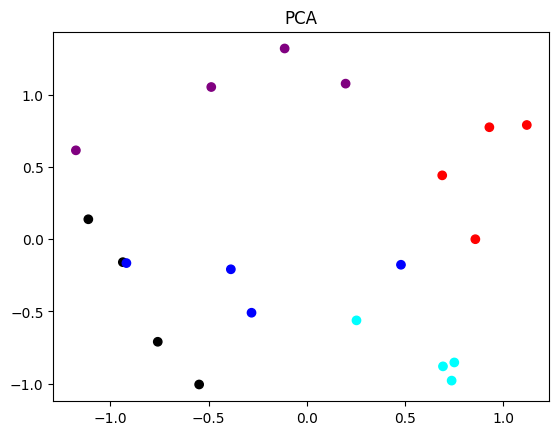

In [329]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=my_cmap)
plt.title("PCA")
plt.show()

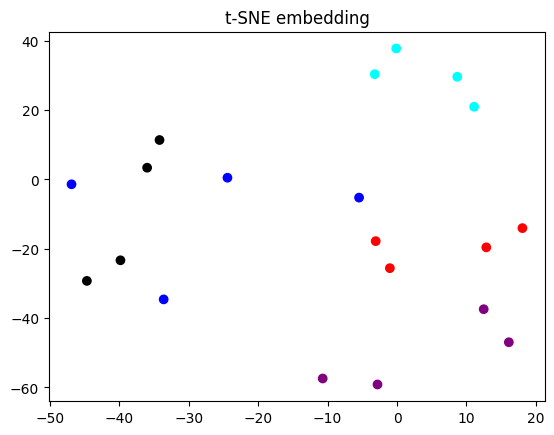

In [330]:
from sklearn.manifold import TSNE

X_tsne = TSNE(n_components=2, perplexity=5, random_state=0).fit_transform(X)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap=my_cmap)
plt.title("t-SNE embedding")
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


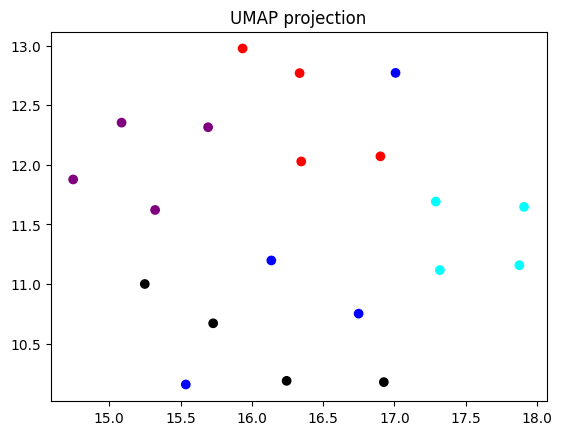

In [331]:
import umap
import matplotlib.pyplot as plt

# Fit UMAP on your features (before PCA)
reducer = umap.UMAP(random_state=0)
X_umap = reducer.fit_transform(X)

# Plot
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap=my_cmap)
plt.title("UMAP projection")
plt.show()


# Rossler from Scratch

In [ ]:
from math import sqrt
from numpy import split
from numpy import array
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import RepeatVector
from keras.layers import TimeDistributed

In [ ]:
rossler_sample_1

y     exo_1     exo_2
date                                    
1970-01-01  0.100000  0.100000  0.100000
1970-01-02  0.073109  0.115441  0.064393
1970-01-03  0.047784  0.127563  0.048429
1970-01-04  0.022529  0.136378  0.041146
1970-01-05 -0.003025  0.141764  0.037791
...              ...       ...       ...
1972-01-01 -5.103309 -1.076127  0.018428
1972-01-02 -4.897693 -1.834410  0.018649
1972-01-03 -4.584573 -2.577064  0.019085
1972-01-04 -4.167350 -3.288262  0.019737
1972-01-05 -3.651688 -3.952366  0.020622

[735 rows x 3 columns]

In [ ]:
rossler_sample_1 = rossler_sample_1[['y']]

In [ ]:
rossler_sample_1

y
date                
1970-01-01  0.100000
1970-01-02  0.073109
1970-01-03  0.047784
1970-01-04  0.022529
1970-01-05 -0.003025
...              ...
1972-01-01 -5.103309
1972-01-02 -4.897693
1972-01-03 -4.584573
1972-01-04 -4.167350
1972-01-05 -3.651688

[735 rows x 1 columns]

In [ ]:
# Apply a MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(rossler_sample_1), columns = ['y'])

In [ ]:
# Preparing the sequence data
ylist = list(df['y'])

n_future = 366
n_past = 366
total_period = 2*366

idx_end = len(ylist)
idx_start = idx_end - total_period

X_new = []
y_new = []

while idx_start > 0:
  x_line = ylist[idx_start:idx_start+n_past]
  y_line = ylist[idx_start+n_past:idx_start+total_period]

  X_new.append(x_line)
  y_new.append(y_line)

  idx_start = idx_start - 1

# converting list of lists to numpy array
import numpy as np
X_new = np.array(X_new)
y_new = np.array(y_new)

In [ ]:
X_new.shape

(6618, 366)

In [ ]:
# split into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.1, random_state = 42)

In [ ]:
X_train.shape

(5956, 366)

In [ ]:
X_test.shape

(662, 366)

In [ ]:
# Reshape the data to be recognized by Keras

batch_size = 32

n_samples = X_train.shape[0]
n_timesteps = X_train.shape[1]
n_steps = y_train.shape[1]
n_features = 1

X_train_rs = X_train.reshape(n_samples, n_timesteps, n_features)
X_test_rs = X_test.reshape(X_test.shape[0], n_timesteps, n_features)

In [ ]:
# One-Layer LSTM
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

random.seed(42)

batch_size = 32

simple_model = Sequential([
    LSTM(64, activation='tanh', input_shape=(n_timesteps, n_features)),
    Dense(y_train.shape[1]),
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
simple_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 64)             │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 366)            │        23,790 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,686 (158.93 KB)

 Trainable params: 40,686 (158.93 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import keras

In [ ]:
simple_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.01),
    loss='mean_absolute_error',
    metrics=['mean_absolute_error'],
)

In [ ]:
smod_history = simple_model.fit(X_train_rs, y_train,
                                validation_split=0.2,
                                epochs=5,
                                batch_size=batch_size,
                                shuffle = True
                                )

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.4556 - mean_absolute_error: 0.4556 - val_loss: 0.4288 - val_mean_absolute_error: 0.4288
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - loss: 0.4301 - mean_absolute_error: 0.4301 - val_loss: 0.2900 - val_mean_absolute_error: 0.2900
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step - loss: 0.2899 - mean_absolute_error: 0.2899 - val_loss: 0.2342 - val_mean_absolute_error: 0.2342
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step - loss: 0.2339 - mean_absolute_error: 0.2339 - val_loss: 0.1397 - val_mean_absolute_error: 0.1397
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - loss: 0.1371 - mean_absolute_error: 0.1371 - val_loss: 0.0986 - val_mean_absolute_error: 0.0986


In [ ]:
preds = simple_model.predict(X_test_rs)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


In [ ]:
preds.shape

(662, 366)

In [ ]:
preds.shape[1]

366

In [ ]:
y_test.shape

(662, 366)

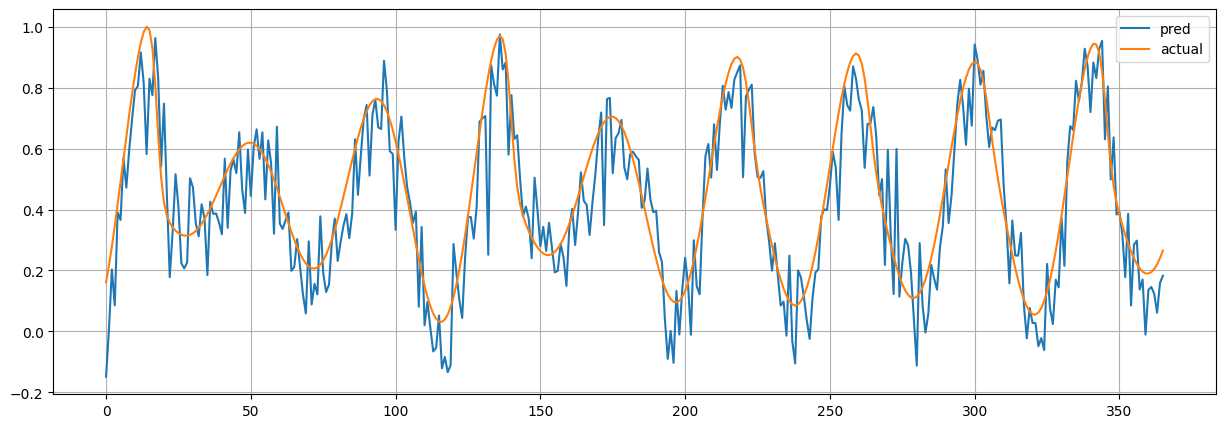

In [ ]:
fig = plt.figure(figsize=(15,5))
plt.plot(preds[0],label='pred')
plt.plot(y_test[0], label='actual')
plt.legend()
plt.grid()
plt.show()

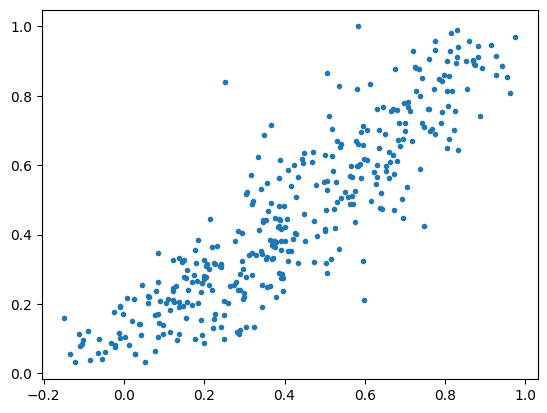

In [ ]:
plt.plot(preds[0],y_test[0],ls= '',marker = '.')

In [ ]:
from sklearn.metrics import r2_score
print(r2_score(preds,y_test))

nan


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


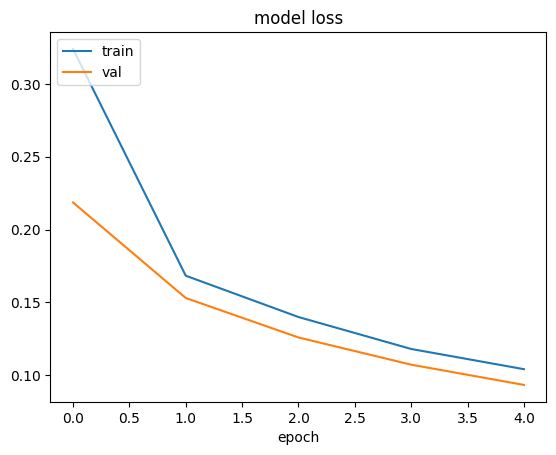

In [ ]:
plt.plot(smod_history.history['loss'])
plt.plot(smod_history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Multivariate Rossler LSTM

In [ ]:
rossler_sample_1

y     exo_1     exo_2
date                                    
1970-01-01  0.100000  0.100000  0.100000
1970-01-02  0.073109  0.115441  0.064393
1970-01-03  0.047784  0.127563  0.048429
1970-01-04  0.022529  0.136378  0.041146
1970-01-05 -0.003025  0.141764  0.037791
...              ...       ...       ...
1972-01-01 -5.103309 -1.076127  0.018428
1972-01-02 -4.897693 -1.834410  0.018649
1972-01-03 -4.584573 -2.577064  0.019085
1972-01-04 -4.167350 -3.288262  0.019737
1972-01-05 -3.651688 -3.952366  0.020622

[735 rows x 3 columns]

In [ ]:
# Apply a MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Scale
scaler = MinMaxScaler()
data = scaler.fit_transform(rossler_sample_1)

In [ ]:
data

array([[4.48365586e-01, 5.84637381e-01, 3.98346340e-03],
       [4.47055159e-01, 5.85467114e-01, 2.34280728e-03],
       [4.45821052e-01, 5.86118513e-01, 1.60725087e-03],
       ...,
       [2.20082163e-01, 4.40781604e-01, 2.55202762e-04],
       [2.40413841e-01, 4.02564376e-01, 2.85263376e-04],
       [2.65542505e-01, 3.66877822e-01, 3.26024940e-04]])

In [ ]:
# # Parameters
# n_past, n_future = 500, 500
# n_feats = data.shape[1]

# # Build sequences
# X, y = [], []
# for s in range(len(data) - (n_past + n_future) + 1):
#     X.append(data[s:s+n_past])
#     y.append(data[s+n_past:s+n_past+n_future])
# X, y = np.array(X), np.array(y)

# print(X.shape, y.shape)
# # (941, 50, 3) for X and (941, 10, 3) for y

In [ ]:
# Preparing the sequence data
ylist = list(data)

n_future = 366
n_past = 366
total_period = 2*366

idx_end = len(ylist)
idx_start = idx_end - total_period

X_new = []
y_new = []

while idx_start > 0:
  x_line = ylist[idx_start:idx_start+n_past]
  y_line = ylist[idx_start+n_past:idx_start+total_period]

  X_new.append(x_line)
  y_new.append(y_line)

  idx_start = idx_start - 1

# converting list of lists to numpy array
import numpy as np
X_new = np.array(X_new)
y_new = np.array(y_new)

In [ ]:
# # FIt a PCA with maximum number of components
# from sklearn.decomposition import PCA
# mypca = PCA()
# mypca.fit(rossler_sample_1)

# # Make a scree plot
# import matplotlib.pyplot as plt
# plt.plot(mypca.explained_variance_ratio_)
# plt.show()

# # mypca = PCA(2)
# # rossler_sample_1 = mypca.fit_transform(rossler_sample_1)

In [ ]:
# split into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.1, random_state = 42)

In [ ]:
# Reshape the data to be recognized by Keras

batch_size = 32

n_samples = X_train.shape[0]
n_timesteps = X_train.shape[1]
n_steps = y_train.shape[1]
n_features = 3

X_train_rs = X_train.reshape(n_samples, n_timesteps, n_features)
X_test_rs = X_test.reshape(X_test.shape[0], n_timesteps, n_features)

In [ ]:
X_train_rs.shape

(2, 366, 3)

In [ ]:
y_train.shape

(2, 366, 3)

In [ ]:
# One-Layer LSTM
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

random.seed(42)

batch_size = 32

# simple_model = Sequential([
#     LSTM(64, activation='tanh', input_shape=(n_timesteps, n_features)),
#     Dense(y_train.shape[1]),
# ])

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, TimeDistributed

simple_model = Sequential([
    LSTM(64, activation='tanh', return_sequences=True, input_shape=(n_timesteps, n_features)),
    TimeDistributed(Dense(n_features))
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
simple_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 366, 64)        │        17,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_2              │ (None, 366, 3)         │           195 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,603 (68.76 KB)

 Trainable params: 17,603 (68.76 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import keras

In [ ]:
simple_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.01),
    loss='mean_absolute_error',
    metrics=['mean_absolute_error'],
)

In [ ]:
smod_history = simple_model.fit(X_train_rs, y_train,
                                validation_split=0.2,
                                epochs=5,
                                batch_size=batch_size,
                                shuffle = True
                                )

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 22s 22s/step - loss: 0.3131 - mean_absolute_error: 0.3131 - val_loss: 0.2039 - val_mean_absolute_error: 0.2039
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - loss: 0.2040 - mean_absolute_error: 0.2040 - val_loss: 0.1965 - val_mean_absolute_error: 0.1965
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - loss: 0.1964 - mean_absolute_error: 0.1964 - val_loss: 0.1687 - val_mean_absolute_error: 0.1687
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step - loss: 0.1687 - mean_absolute_error: 0.1687 - val_loss: 0.1594 - val_mean_absolute_error: 0.1594
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step - loss: 0.1592 - mean_absolute_error: 0.1592 - val_loss: 0.1509 - val_mean_absolute_error: 0.1509


In [ ]:
preds = simple_model.predict(X_test_rs)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


In [ ]:
preds.shape

(1, 366, 3)

In [ ]:
import numpy as np

# Assuming 'preds' is your predictions array with shape (635, 500, 3)
# Extract the first sample (index 0), all 500 time steps, and the first feature (index 0)
first_sample_first_feature = preds[0, :, 0]


In [ ]:
y_test[0]

array([[1.60915229e-01, 1.76487988e-01, 1.41401268e-04],
       [2.16533642e-01, 1.23916860e-01, 2.10590613e-04],
       [2.78461141e-01, 7.92363974e-02, 3.05698677e-04],
       ...,
       [2.20082163e-01, 4.40781604e-01, 2.55202762e-04],
       [2.40413841e-01, 4.02564376e-01, 2.85263376e-04],
       [2.65542505e-01, 3.66877822e-01, 3.26024940e-04]])

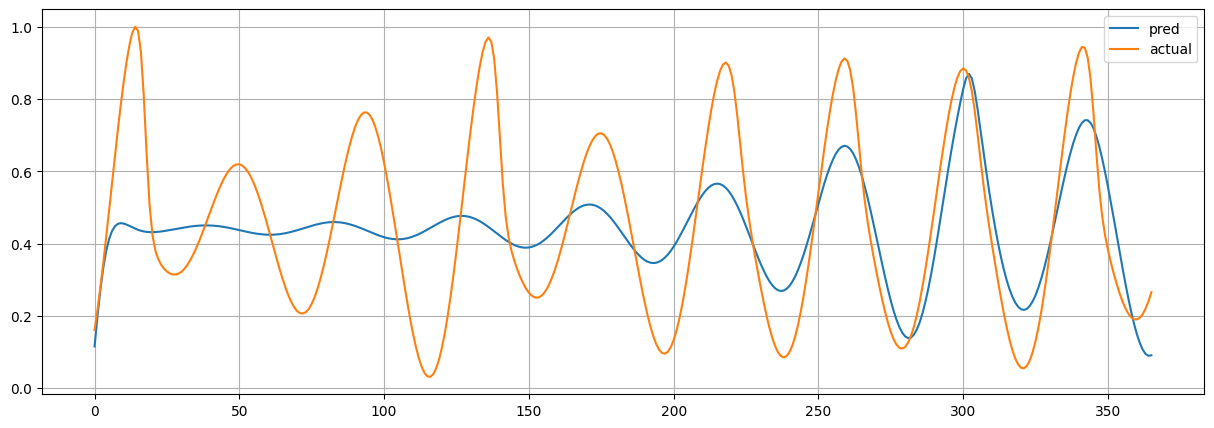

In [ ]:
fig = plt.figure(figsize=(15,5))
plt.plot(preds[0, :, 0],label='pred')
plt.plot(y_test[0, :, 0], label='actual')
plt.legend()
plt.grid()
plt.show()

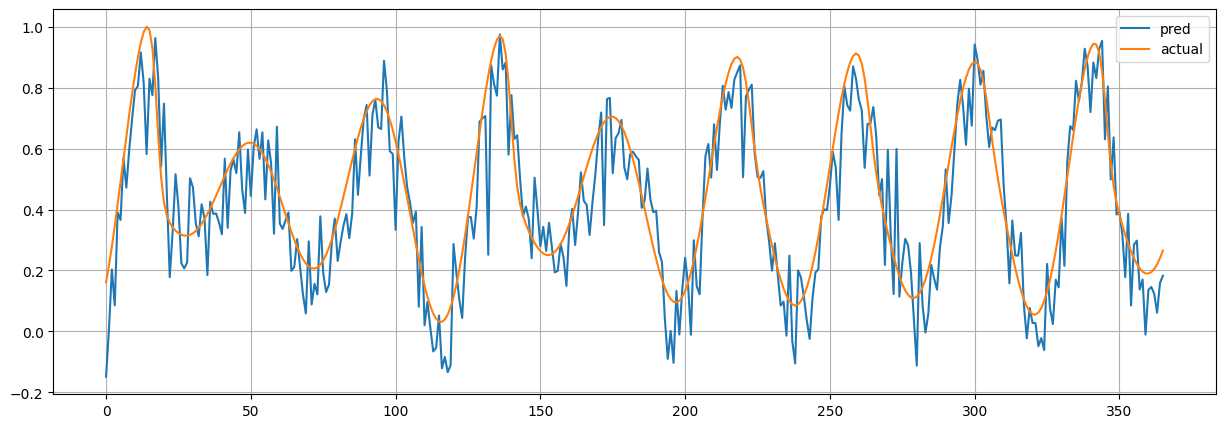

In [ ]:
fig = plt.figure(figsize=(15,5))
plt.plot(preds[0],label='pred')
plt.plot(y_test[0], label='actual')
plt.legend()
plt.grid()
plt.show()

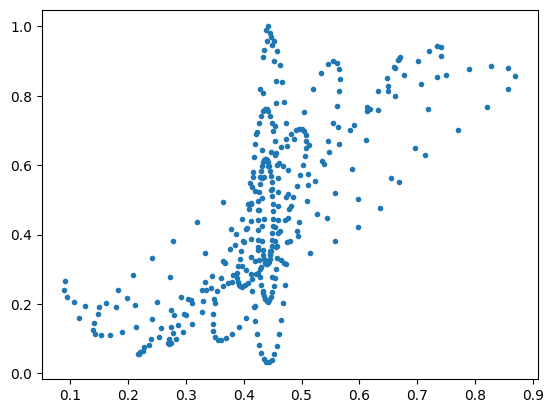

In [ ]:
plt.plot(preds[0, :, 0],y_test[0, :, 0],ls= '',marker = '.')
plt.show()

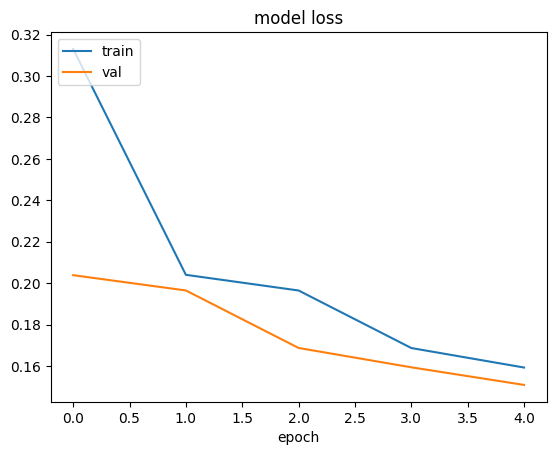

In [ ]:
plt.plot(smod_history.history['loss'])
plt.plot(smod_history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()